In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deloitte_data_finname = 'Deloitte_DrugDiscovery_dataset.csv'
chemical_features_finname = 'reduced_chem_features.csv'
protein_features_finname = 'uniprot_features_df.csv'

In [3]:
kiba_df = pd.read_csv(deloitte_data_finname)
chem_df = pd.read_csv(chemical_features_finname)
prot_df = pd.read_csv(protein_features_finname)

In [4]:
chem_df.columns

Index(['pubchem_cid', 'mw', 'polararea', 'complexity', 'xlogp', 'heavycnt',
       'hbonddonor', 'hbondacc', 'rotbonds', 'exactmass', 'monoisotopicmass',
       'charge', 'covalentunitcnt', 'isotopeatomcnt', 'totalatomstereocnt',
       'definedatomstereocnt', 'undefinedatomstereocnt', 'totalbondstereocnt',
       'definedbondstereocnt', 'undefinedbondstereocnt', 'pclidcnt', 'gpidcnt',
       'gpfamilycnt', 'annothitcnt'],
      dtype='object')

In [5]:
prot_df.columns

Index(['UniProt_ID', 'Length', 'Mass', 'Annotation', 'Beta strand', 'Chain',
       'Disulfide bond', 'Domain', 'Glycosylation', 'Helix', 'Signal',
       'Active site', 'Binding site', 'Propeptide', 'Region', 'DNA binding',
       'Site', 'Topological domain', 'Transmembrane', 'Alternative sequence',
       'Compositional bias', 'Intramembrane', 'Repeat', 'Sequence conflict',
       'Coiled coil', 'Natural variant', 'Modified residue', 'Mutagenesis',
       'Transit peptide', 'Motif', 'Zinc finger', 'Turn',
       'Initiator methionine', 'Lipidation', 'Peptide', 'Sequence uncertainty',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'protein_seq_molecular_weight',
       'protein_seq_pI', 'protein_seq_aromaticity',
       'protein_seq_instability_index', 'protein_seq_gravy',
       'protein_seq_struct_fraction_helix', 'protein_seq_struct_fraction_turn',
       'protein_seq_struct_fraction_sheet'],
      dtype='object')

In [6]:
import pickle

In [7]:
kiba_df.head()

,UniProt_ID,pubchem_cid,kiba_score,kiba_score_estimated
0,A0A0B4J268,7428.0,21400.0,True
1,A0A0B4J268,65303.0,21300.0,True
2,A0A0B4J268,96506.0,21400.0,True
3,A0A0B4J268,174326.0,21300.0,True
4,A0A0B4J268,225906.0,7910.0,True


In [8]:
kiba_df = kiba_df.dropna()

In [9]:
kiba_df.shape

(1095027, 4)

In [10]:
kiba_df = kiba_df.groupby(['UniProt_ID', 'pubchem_cid'], as_index=False).mean()

In [23]:
kiba_df.shape

(1030152, 90)

In [12]:
prot_df.head()

,UniProt_ID,Length,Mass,Annotation,Beta strand,Chain,Disulfide bond,Domain,Glycosylation,Helix,...,W,Y,protein_seq_molecular_weight,protein_seq_pI,protein_seq_aromaticity,protein_seq_instability_index,protein_seq_gravy,protein_seq_struct_fraction_helix,protein_seq_struct_fraction_turn,protein_seq_struct_fraction_sheet
0,A0A0B4J268,109,12215,3.0,7.0,1.0,1.0,1.0,1.0,1.0,...,0.009174,0.055046,12214.7681,7.761558,0.100917,25.800000,-0.074312,0.339450,0.238532,0.183486
1,A0A0C5PRQ1,614,69695,4.0,0.0,1.0,8.0,4.0,2.0,0.0,...,0.016287,0.035831,69694.1116,7.986489,0.094463,46.350847,-0.551303,0.263844,0.231270,0.208469
2,A0A0G2K344,1068,124354,5.0,0.0,1.0,0.0,5.0,0.0,0.0,...,0.017790,0.037453,124352.6963,6.773980,0.096442,48.338015,-0.308240,0.335206,0.199438,0.265918
3,A0QVH7,398,41064,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.015075,0.007538,41063.9083,4.629275,0.047739,27.753266,0.129899,0.276382,0.228643,0.341709
4,A0R666,217,23512,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.013825,0.013825,23511.5131,6.762044,0.073733,43.610230,-0.169124,0.253456,0.221198,0.331797


In [13]:
kiba_df = kiba_df.merge(prot_df, how='inner', on='UniProt_ID')

In [14]:
kiba_df['pubchem_cid'] = kiba_df['pubchem_cid'].astype(int)

In [15]:
kiba_df.shape

(1071302, 67)

In [16]:
chem_df.head()

,pubchem_cid,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,...,totalatomstereocnt,definedatomstereocnt,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt
0,7428,184.15,87.0,181.0,0.9,13,3,5,2,184.037,...,0,0,0,0,0,0,1089,10449,3926,14
1,65303,272.26,98.7,327.0,2.8,20,4,4,2,272.080,...,0,0,0,0,0,0,19,6455,1514,8
2,96506,302.23,127.0,469.0,2.0,22,5,7,1,302.043,...,0,0,0,0,0,0,8,15,9,8
3,174326,294.31,77.3,483.0,3.5,22,2,5,3,294.112,...,0,0,0,0,0,0,0,18,10,4
4,225906,234.16,112.0,411.0,1.7,17,2,6,1,234.028,...,0,0,0,0,0,0,3,33,12,6


In [17]:
kiba_df = kiba_df.merge(chem_df, how='left', on='pubchem_cid')

In [18]:
kiba_df.head()

,UniProt_ID,pubchem_cid,kiba_score,kiba_score_estimated,Length,Mass,Annotation,Beta strand,Chain,Disulfide bond,...,totalatomstereocnt,definedatomstereocnt,undefinedatomstereocnt,totalbondstereocnt,definedbondstereocnt,undefinedbondstereocnt,pclidcnt,gpidcnt,gpfamilycnt,annothitcnt
0,A0A0B4J268,7428,21400.0,1.0,109,12215,3.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1089.0,10449.0,3926.0,14.0
1,A0A0B4J268,65303,21300.0,1.0,109,12215,3.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,6455.0,1514.0,8.0
2,A0A0B4J268,96506,21400.0,1.0,109,12215,3.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,15.0,9.0,8.0
3,A0A0B4J268,174326,21300.0,1.0,109,12215,3.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,10.0,4.0
4,A0A0B4J268,225906,7910.0,1.0,109,12215,3.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,33.0,12.0,6.0


In [19]:
kiba_df.shape

(1071302, 90)

In [20]:
kiba_df = kiba_df.dropna()

In [21]:
kiba_df.shape

(1030152, 90)

In [22]:
kiba_df.shape

(1030152, 90)

In [27]:
X = kiba_df.drop(columns=['pubchem_cid', 'UniProt_ID', 'kiba_score'])

In [28]:
X.shape

(1030152, 87)

In [29]:
y = np.log(kiba_df.kiba_score)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression


In [33]:
from sklearn.metrics import mean_squared_error


In [34]:
reg = LinearRegression().fit(X_train, y_train)


In [35]:
reg.score(X_train, y_train)

0.1197769765842116

In [36]:
reg.score(X_test, y_test)

0.11876718557727561

In [37]:
y_pred = reg.predict(X_test)

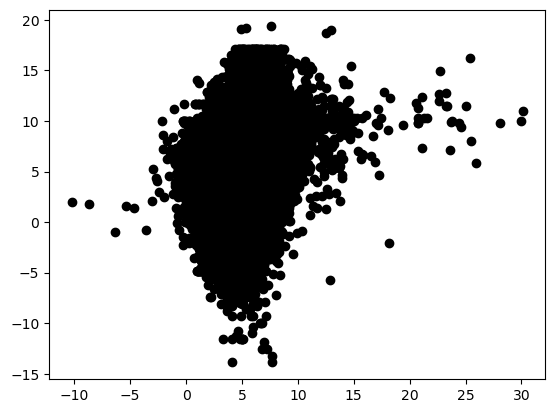

In [38]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [39]:
from sklearn import preprocessing

In [40]:
normalizer = preprocessing.Normalizer().fit(X_train)

In [41]:
X_train_normed = normalizer.transform(X_train)


In [42]:
X_test_normed = normalizer.transform(X_test)

In [43]:
reg = LinearRegression().fit(X_train_normed, y_train)


In [44]:
reg.score(X_train_normed, y_train)

0.11395802283468304

In [45]:
reg.score(X_test_normed, y_test)

0.11214371796473188

In [46]:
from sklearn.ensemble import RandomForestRegressor


In [69]:
rf_regr = RandomForestRegressor(random_state=0)


In [146]:
rf_regr2 = RandomForestRegressor(random_state=0, max_depth=4)


In [70]:
rf_regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [143]:
rf_regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [144]:
rf_regr2.score(X_train, y_train)

0.2614181676185723

In [145]:
rf_regr2.score(X_test, y_test)

0.2603494589018617

In [147]:
rf_regr2 = RandomForestRegressor(random_state=0, max_depth=8)


In [149]:
rf_regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

In [150]:
rf_regr2.score(X_train, y_train)

0.3744941720259424

In [151]:
rf_regr2.score(X_test, y_test)

0.3712589224219204

In [152]:
rf_regr2 = RandomForestRegressor(random_state=0, max_depth=16)


In [153]:
rf_regr2.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, random_state=0)

In [154]:
rf_regr2.score(X_train, y_train)

0.628633970236278

In [155]:
rf_regr2.score(X_test, y_test)

0.5666067415064449

In [47]:
rf_regr2 = RandomForestRegressor(random_state=0, min_samples_split=10)


In [48]:
rf_regr2.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=10, random_state=0)

In [49]:
rf_regr2.score(X_train, y_train)

0.9067801358770553

In [50]:
rf_regr2.score(X_test, y_test)

0.708507989571207

In [51]:
2+2

4

In [55]:
y_pred = rf_regr2.predict(X_test)

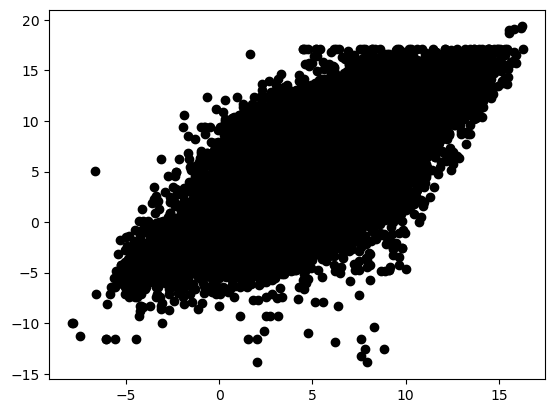

In [56]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [71]:
2+2

4

In [72]:
rf_regr.score(X_train, y_train)

0.958021334336361

In [73]:
rf_regr.score(X_test, y_test)

0.7165234106455753

In [74]:
y_pred = rf_regr.predict(X_test)

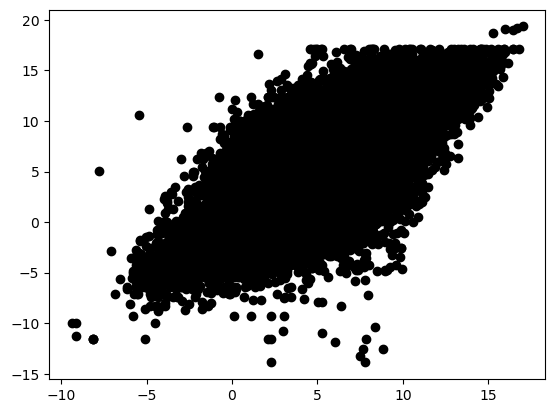

In [75]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [58]:
from xgboost import XGBRegressor

In [67]:
reg = XGBRegressor(
    tree_method="hist",
)
reg.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)])


[0]	validation_0-rmse:3.02888
[1]	validation_0-rmse:2.87389
[2]	validation_0-rmse:2.79040
[3]	validation_0-rmse:2.73327
[4]	validation_0-rmse:2.68868
[5]	validation_0-rmse:2.65712
[6]	validation_0-rmse:2.62987
[7]	validation_0-rmse:2.60302
[8]	validation_0-rmse:2.58341
[9]	validation_0-rmse:2.56245
[10]	validation_0-rmse:2.54267
[11]	validation_0-rmse:2.52848
[12]	validation_0-rmse:2.51621
[13]	validation_0-rmse:2.50242
[14]	validation_0-rmse:2.49450
[15]	validation_0-rmse:2.48904
[16]	validation_0-rmse:2.48039
[17]	validation_0-rmse:2.47437
[18]	validation_0-rmse:2.46465
[19]	validation_0-rmse:2.45445
[20]	validation_0-rmse:2.44944
[21]	validation_0-rmse:2.44024
[22]	validation_0-rmse:2.43635
[23]	validation_0-rmse:2.42911
[24]	validation_0-rmse:2.42308
[25]	validation_0-rmse:2.41943
[26]	validation_0-rmse:2.41689
[27]	validation_0-rmse:2.41268
[28]	validation_0-rmse:2.40835
[29]	validation_0-rmse:2.40182
[30]	validation_0-rmse:2.39800
[31]	validation_0-rmse:2.39497
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred = reg.predict(X_test.values)

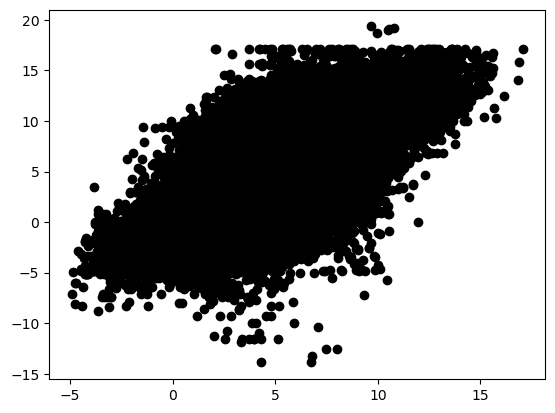

In [74]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [75]:
from sklearn.metrics import r2_score


In [76]:
r2_score(y_test, y_pred)

0.5429000315631799

In [69]:
2+2

4

In [82]:
reg = XGBRegressor(
    max_depth=12,
)
reg.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)])

[0]	validation_0-rmse:2.91580
[1]	validation_0-rmse:2.67696
[2]	validation_0-rmse:2.52883
[3]	validation_0-rmse:2.43573
[4]	validation_0-rmse:2.36601
[5]	validation_0-rmse:2.32096
[6]	validation_0-rmse:2.27832
[7]	validation_0-rmse:2.24772
[8]	validation_0-rmse:2.22463
[9]	validation_0-rmse:2.19683
[10]	validation_0-rmse:2.17595
[11]	validation_0-rmse:2.15668
[12]	validation_0-rmse:2.13838
[13]	validation_0-rmse:2.12037
[14]	validation_0-rmse:2.10120
[15]	validation_0-rmse:2.09594
[16]	validation_0-rmse:2.08466
[17]	validation_0-rmse:2.07502
[18]	validation_0-rmse:2.06536
[19]	validation_0-rmse:2.05418
[20]	validation_0-rmse:2.04277
[21]	validation_0-rmse:2.03677
[22]	validation_0-rmse:2.02837
[23]	validation_0-rmse:2.02202
[24]	validation_0-rmse:2.01648
[25]	validation_0-rmse:2.01016
[26]	validation_0-rmse:2.00114
[27]	validation_0-rmse:1.99683
[28]	validation_0-rmse:1.99338
[29]	validation_0-rmse:1.98880
[30]	validation_0-rmse:1.98566
[31]	validation_0-rmse:1.98005
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
y_pred = reg.predict(X_test.values)

In [86]:
r2_score(y_test, y_pred)

0.6942731765599212

In [89]:
reg = XGBRegressor(
    max_depth=15,
)
reg.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)])

[0]	validation_0-rmse:2.85693
[1]	validation_0-rmse:2.57759
[2]	validation_0-rmse:2.39917
[3]	validation_0-rmse:2.28624
[4]	validation_0-rmse:2.20937
[5]	validation_0-rmse:2.15773
[6]	validation_0-rmse:2.11122
[7]	validation_0-rmse:2.08478
[8]	validation_0-rmse:2.05587
[9]	validation_0-rmse:2.03050
[10]	validation_0-rmse:2.01748
[11]	validation_0-rmse:2.00224
[12]	validation_0-rmse:1.98706
[13]	validation_0-rmse:1.97445
[14]	validation_0-rmse:1.95861
[15]	validation_0-rmse:1.95127
[16]	validation_0-rmse:1.94034
[17]	validation_0-rmse:1.92883
[18]	validation_0-rmse:1.92138
[19]	validation_0-rmse:1.91334
[20]	validation_0-rmse:1.90326
[21]	validation_0-rmse:1.89732
[22]	validation_0-rmse:1.88978
[23]	validation_0-rmse:1.88632
[24]	validation_0-rmse:1.88079
[25]	validation_0-rmse:1.87890
[26]	validation_0-rmse:1.87504
[27]	validation_0-rmse:1.87362
[28]	validation_0-rmse:1.87018
[29]	validation_0-rmse:1.86698
[30]	validation_0-rmse:1.86428
[31]	validation_0-rmse:1.85930
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
y_pred = reg.predict(X_test.values)

In [91]:
r2_score(y_test, y_pred)

0.7135001157342945

In [92]:
y_pred_train = reg.predict(X_train.values)

In [93]:
r2_score(y_train, y_pred_train)

0.9472547990378604

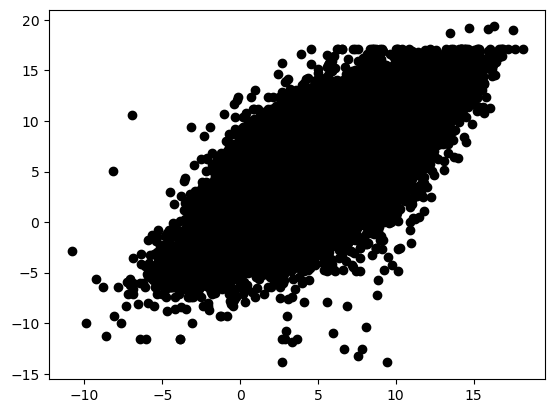

In [94]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [97]:
import xgboost as xgb

In [98]:
xgb.save(reg, 'model.json')

AttributeError: module 'xgboost' has no attribute 'save'

In [99]:
reg.save_model('model_file_name.json')


In [100]:
reg.feature_importances_

array([0.00429033, 0.00132823, 0.00840531, 0.00411652, 0.00340499,
       0.00551519, 0.0095376 , 0.00691056, 0.00626532, 0.00718438,
       0.00644183, 0.01143346, 0.00998032, 0.01125114, 0.00528893,
       0.00715556, 0.00959269, 0.01137914, 0.09436288, 0.00540521,
       0.00624833, 0.00622836, 0.01603658, 0.00792269, 0.02336015,
       0.00808852, 0.00850043, 0.00879579, 0.01132564, 0.01320042,
       0.01378333, 0.00892046, 0.01262589, 0.00960026, 0.01861352,
       0.00070154, 0.00996364, 0.01077038, 0.01013372, 0.01116088,
       0.01215116, 0.01191455, 0.0137359 , 0.0117174 , 0.01030123,
       0.01270892, 0.01155331, 0.01291686, 0.0166947 , 0.01335482,
       0.01440713, 0.01116102, 0.01230147, 0.01173606, 0.01358728,
       0.01416767, 0.00332256, 0.0113259 , 0.01553949, 0.01316687,
       0.01722222, 0.01721498, 0.01178654, 0.01574423, 0.00228827,
       0.00361881, 0.00351328, 0.00300703, 0.01265445, 0.00532854,
       0.00428096, 0.00408399, 0.00671262, 0.01182897, 0.00971

In [101]:
reg_importances = reg.feature_importances_

In [76]:
importances = rf_regr.feature_importances_


In [92]:
with open('random_forest_model_1.pkl','wb') as f:
    pickle.dump(rf_regr,f)


In [93]:
rf_regr

RandomForestRegressor(random_state=0)

In [82]:
importance_order = np.argsort(importances)

In [102]:
reg_importance_order = np.argsort(reg_importances)

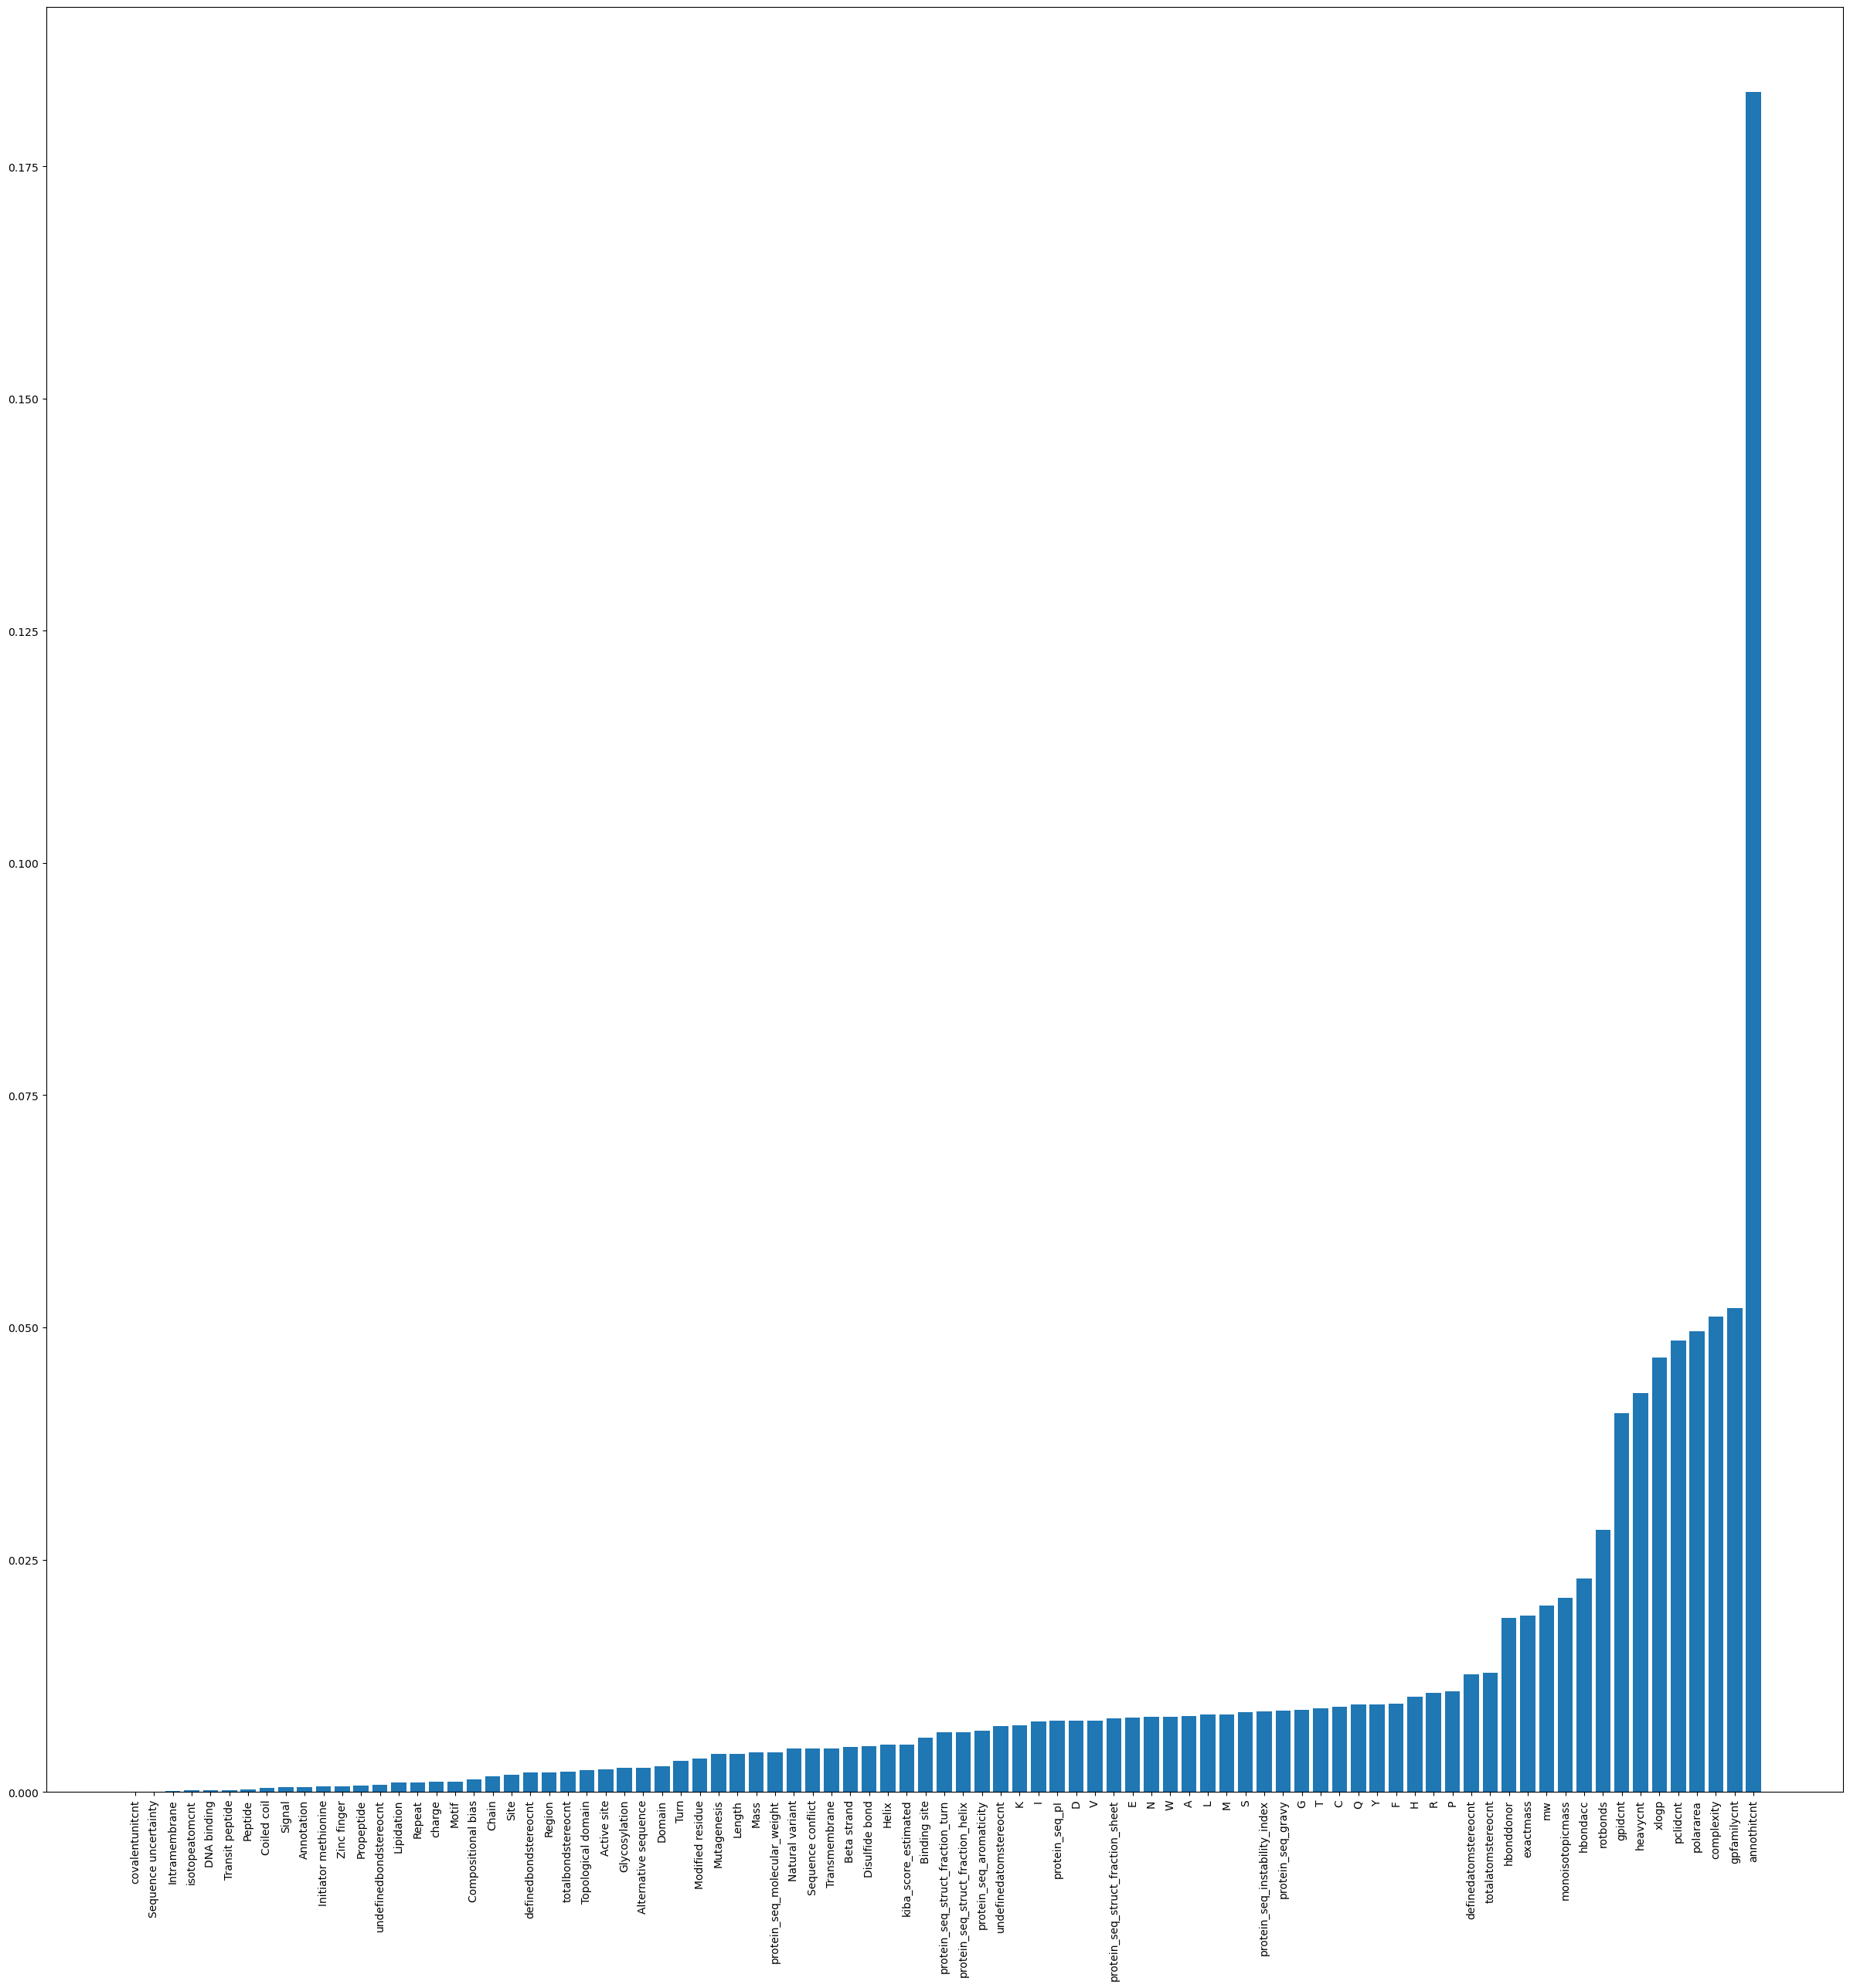

In [85]:
plt.figure(figsize =(30,30))
plt.bar(X.columns[importance_order], importances[importance_order])
plt.xticks(rotation=90)
plt.show()

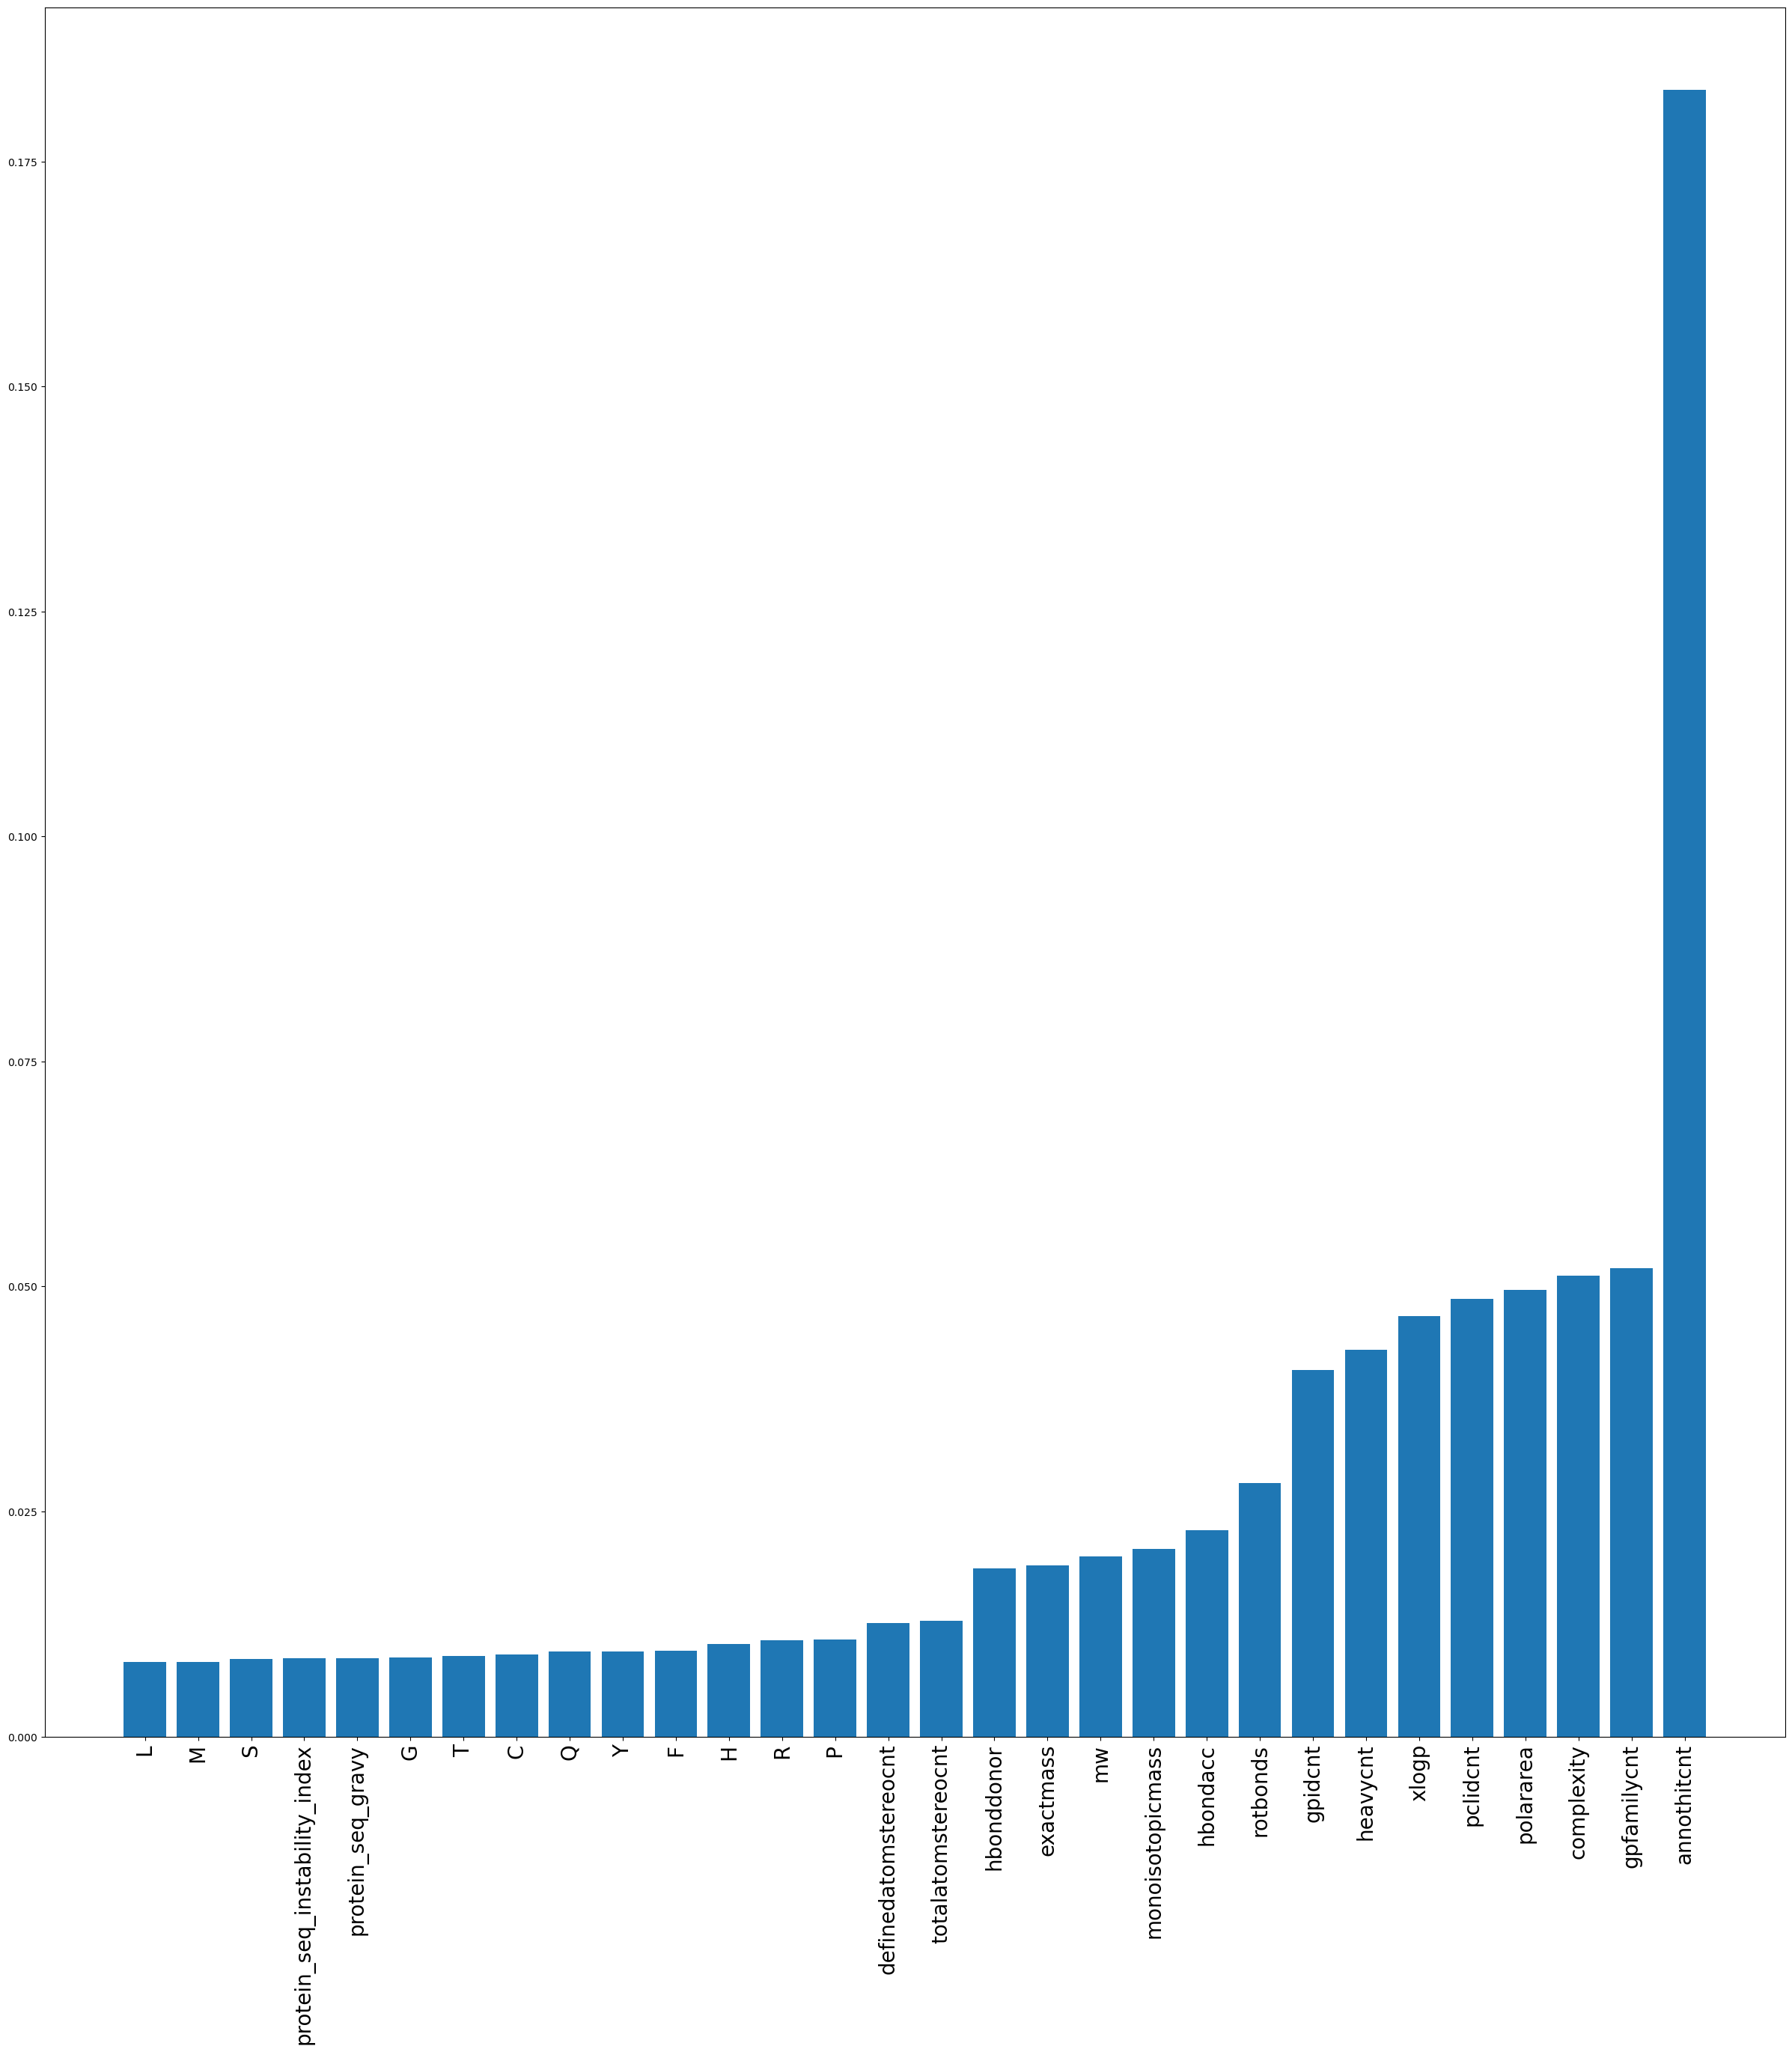

In [90]:
plt.figure(figsize =(30,30))
plt.bar(X.columns[importance_order][-30:], importances[importance_order][-30:])
plt.xticks(rotation=90, fontsize=20)
plt.show()

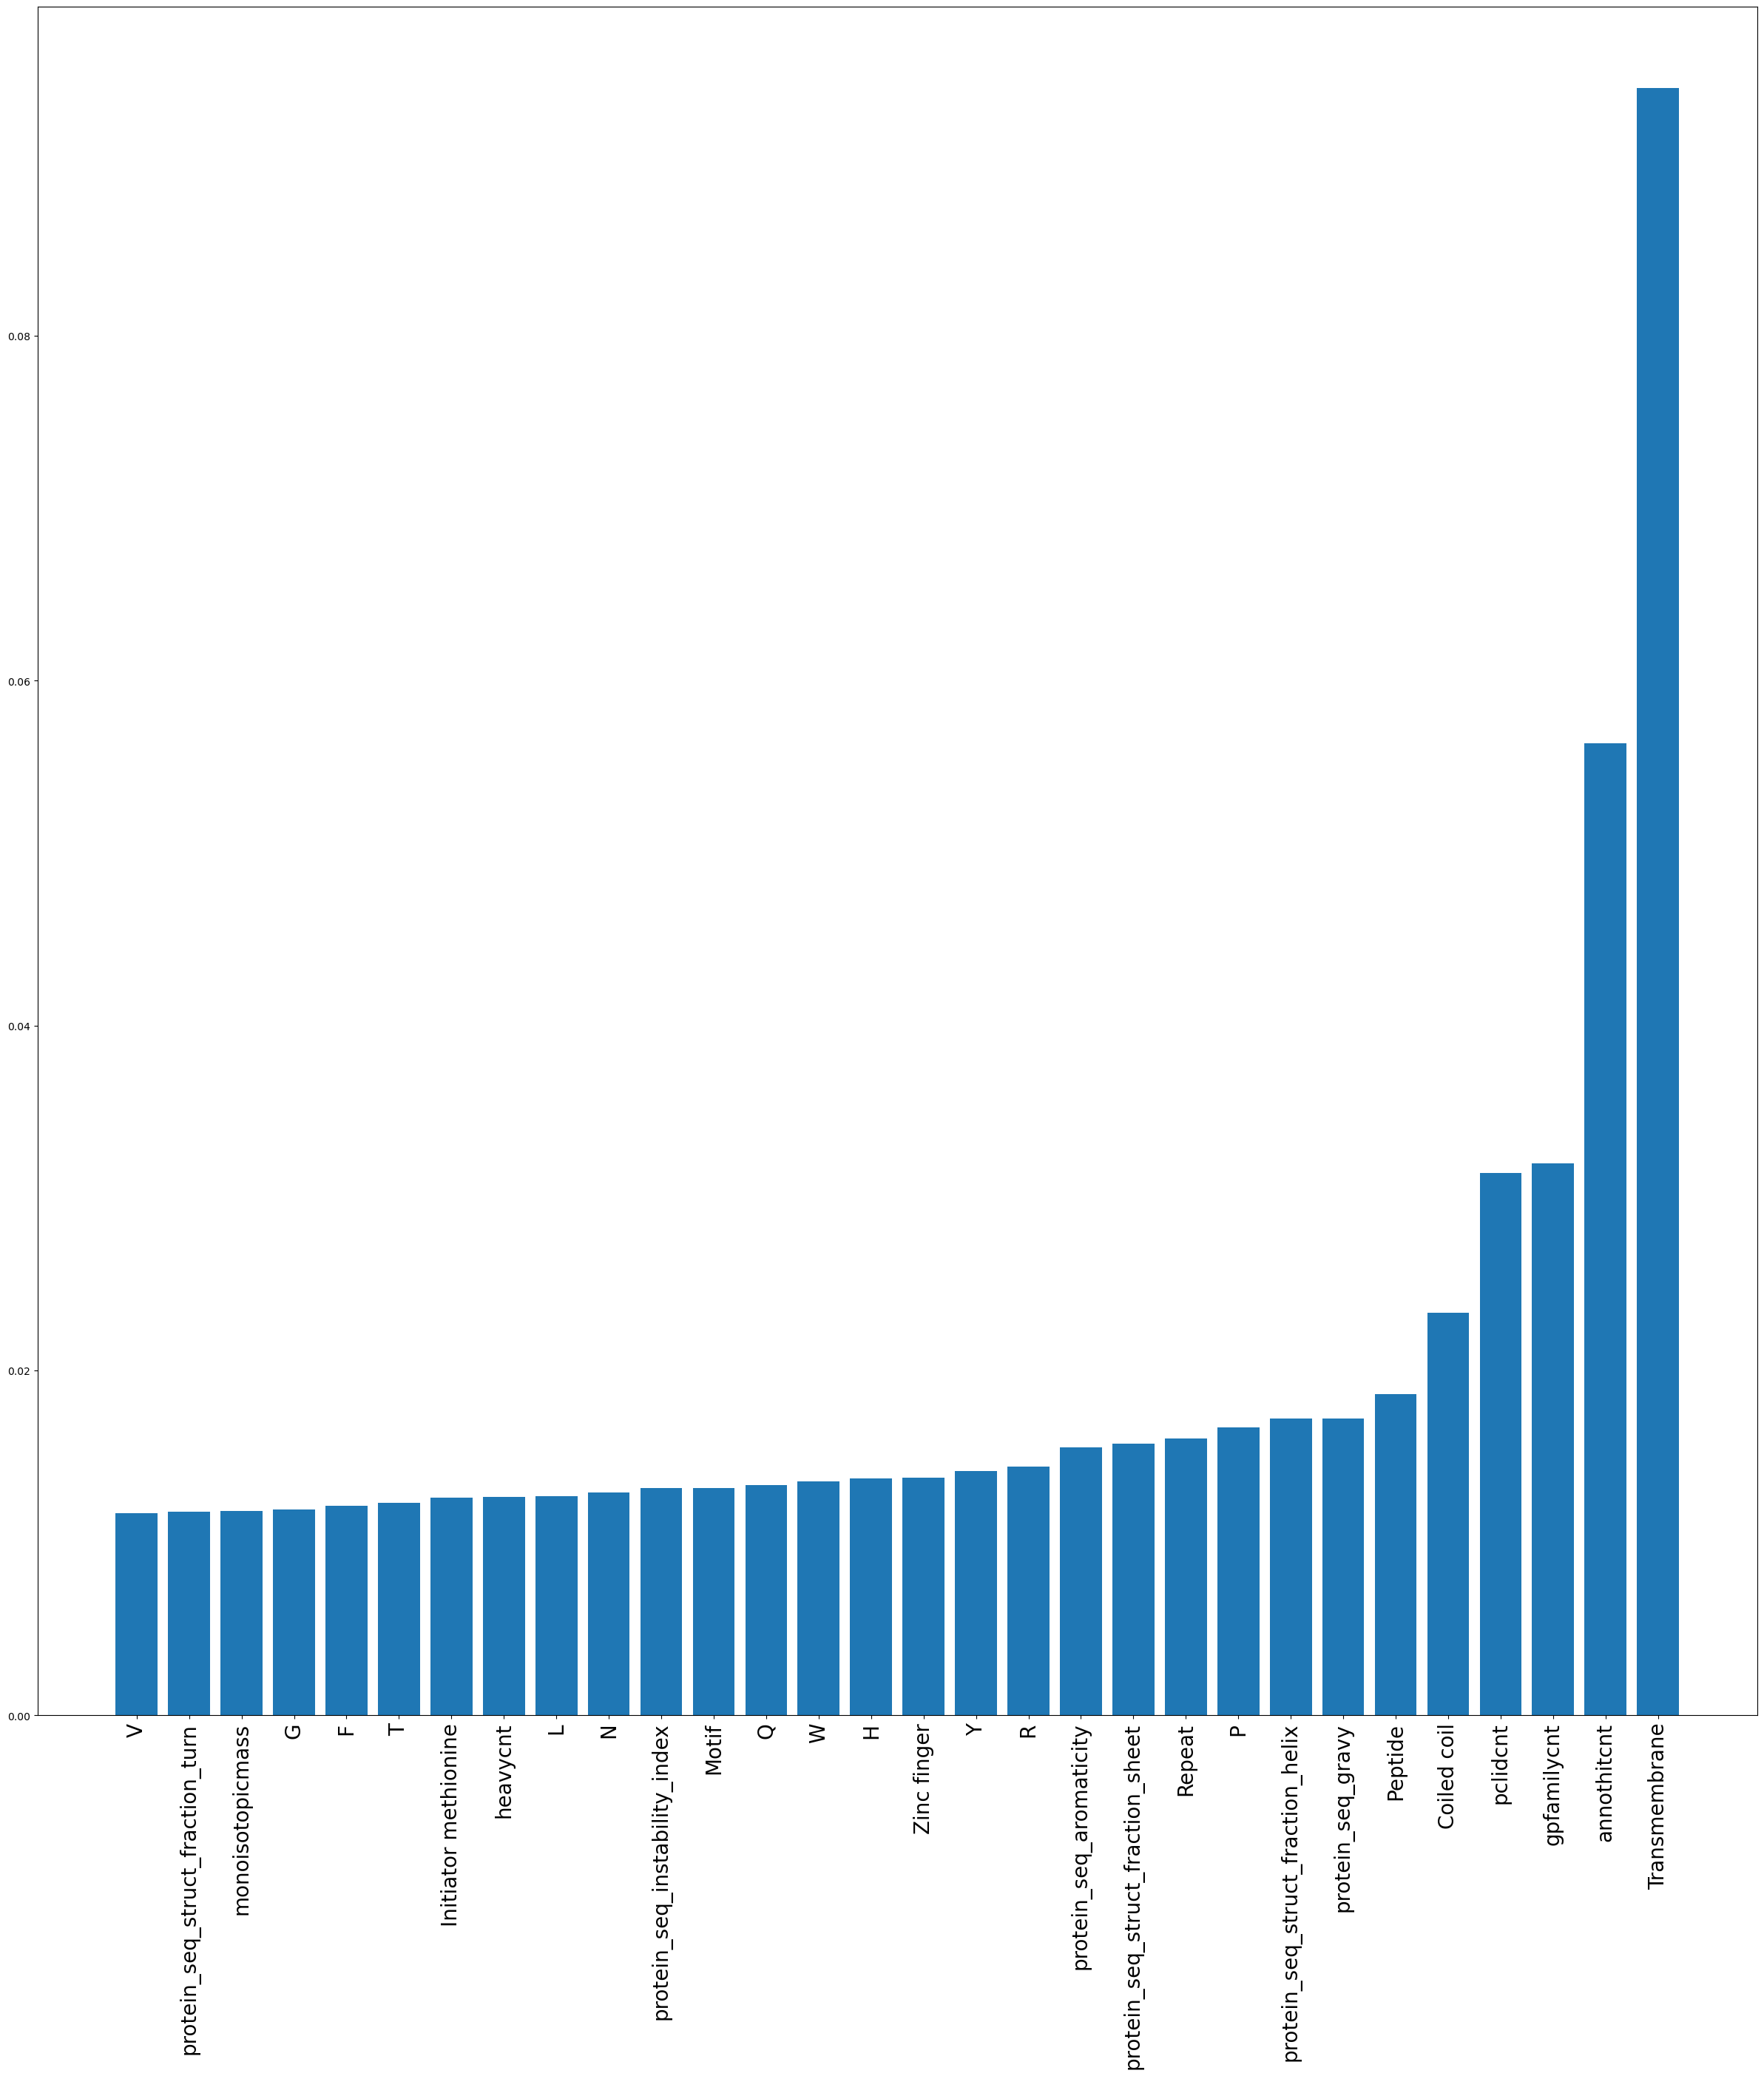

In [103]:
plt.figure(figsize =(30,30))
plt.bar(X.columns[reg_importance_order][-30:], reg_importances[reg_importance_order][-30:])
plt.xticks(rotation=90, fontsize=20)
plt.show()

In [77]:
2+2

4

In [78]:
importances

array([5.09521644e-03, 4.07241198e-03, 4.23694480e-03, 5.06262402e-04,
       4.81141640e-03, 1.65217630e-03, 4.88173865e-03, 2.77883021e-03,
       2.54033604e-03, 5.08535246e-03, 4.80603407e-04, 2.40153482e-03,
       5.82400506e-03, 6.27021327e-04, 2.11850378e-03, 1.31573017e-04,
       1.85415208e-03, 2.34200943e-03, 4.70176449e-03, 2.56589476e-03,
       1.32605130e-03, 1.18787973e-04, 1.02922391e-03, 4.68377622e-03,
       4.23560035e-04, 4.65843277e-03, 3.59239602e-03, 4.04172292e-03,
       1.41690402e-04, 1.11160601e-03, 5.65811649e-04, 3.33905645e-03,
       5.49518928e-04, 1.00399396e-03, 2.13521259e-04, 1.99790326e-07,
       8.14215035e-03, 9.13224964e-03, 7.68304749e-03, 7.98453421e-03,
       9.49265588e-03, 8.78834069e-03, 1.02643661e-02, 7.53851735e-03,
       7.14490082e-03, 8.28784336e-03, 8.30247896e-03, 8.09520142e-03,
       1.08137551e-02, 9.41856589e-03, 1.06713383e-02, 8.59614194e-03,
       8.97612815e-03, 7.68638717e-03, 8.11136377e-03, 9.43184528e-03,
      

In [79]:
X.columns

Index(['kiba_score_estimated', 'Length', 'Mass', 'Annotation', 'Beta strand',
       'Chain', 'Disulfide bond', 'Domain', 'Glycosylation', 'Helix', 'Signal',
       'Active site', 'Binding site', 'Propeptide', 'Region', 'DNA binding',
       'Site', 'Topological domain', 'Transmembrane', 'Alternative sequence',
       'Compositional bias', 'Intramembrane', 'Repeat', 'Sequence conflict',
       'Coiled coil', 'Natural variant', 'Modified residue', 'Mutagenesis',
       'Transit peptide', 'Motif', 'Zinc finger', 'Turn',
       'Initiator methionine', 'Lipidation', 'Peptide', 'Sequence uncertainty',
       'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q',
       'R', 'S', 'T', 'V', 'W', 'Y', 'protein_seq_molecular_weight',
       'protein_seq_pI', 'protein_seq_aromaticity',
       'protein_seq_instability_index', 'protein_seq_gravy',
       'protein_seq_struct_fraction_helix', 'protein_seq_struct_fraction_turn',
       'protein_seq_struct_fraction_sheet', 'mw', 'polara

In [60]:
from sklearn.neural_network import MLPRegressor


In [61]:
regr_mlp = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)


In [62]:
regr_mlp.fit(X_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [63]:
2+2

4

In [65]:
regr_mlp.score(X_train, y_train)

-1.7473399631429132e-05

In [66]:
regr_mlp.score(X_test, y_test)

-4.560218500015978e-05

In [67]:
y_pred = regr_mlp.predict(X_test)

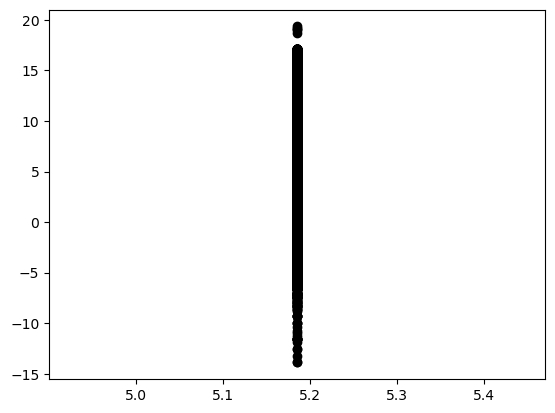

In [68]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [97]:
X.columns[importance_order][-45:]

Index(['Binding site', 'protein_seq_struct_fraction_turn',
       'protein_seq_struct_fraction_helix', 'protein_seq_aromaticity',
       'undefinedatomstereocnt', 'K', 'I', 'protein_seq_pI', 'D', 'V',
       'protein_seq_struct_fraction_sheet', 'E', 'N', 'W', 'A', 'L', 'M', 'S',
       'protein_seq_instability_index', 'protein_seq_gravy', 'G', 'T', 'C',
       'Q', 'Y', 'F', 'H', 'R', 'P', 'definedatomstereocnt',
       'totalatomstereocnt', 'hbonddonor', 'exactmass', 'mw',
       'monoisotopicmass', 'hbondacc', 'rotbonds', 'gpidcnt', 'heavycnt',
       'xlogp', 'pclidcnt', 'polararea', 'complexity', 'gpfamilycnt',
       'annothitcnt'],
      dtype='object')

In [99]:
X_train[X.columns[importance_order][-45:]].shape

(690201, 45)

In [123]:
X_train_mini = X_train[X.columns[importance_order][-45:]]

In [122]:
X_test_mini = X_test[X.columns[importance_order][-45:]]

In [126]:
regr_mlp = MLPRegressor(random_state=1, activation='relu', solver='adam')


In [127]:
regr_mlp.fit(X_train_mini, y_train)

/Users/alexandermuratov/miniconda3/envs/funz/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=1)

In [128]:
regr_mlp.score(X_train_mini, y_train)

0.30852836049099586

In [129]:
regr_mlp.score(X_test_mini, y_test)

0.3081454066023508

In [130]:
y_pred = regr_mlp.predict(X_test_mini)

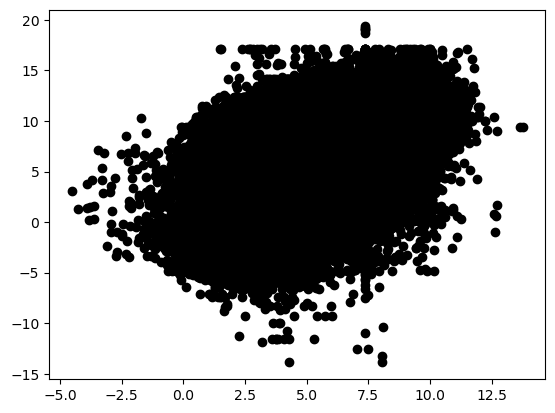

In [131]:
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [132]:
regr_mlp2 = MLPRegressor(random_state=1, activation='relu', solver='lbfgs')


/Users/alexandermuratov/miniconda3/envs/funz/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


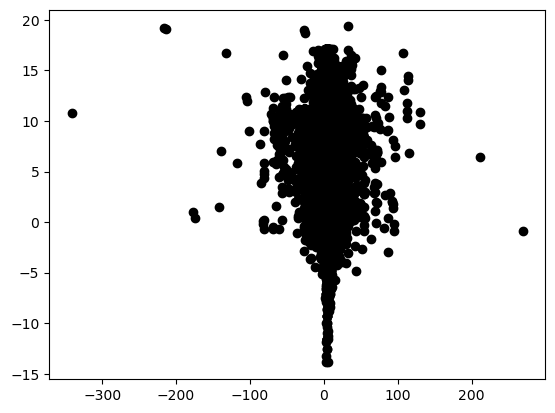

In [133]:
regr_mlp2.fit(X_train_mini, y_train)
regr_mlp2.score(X_train_mini, y_train)
regr_mlp2.score(X_test_mini, y_test)
y_pred = regr_mlp2.predict(X_test_mini)
plt.plot(y_pred, y_test, 'ok')
plt.show()

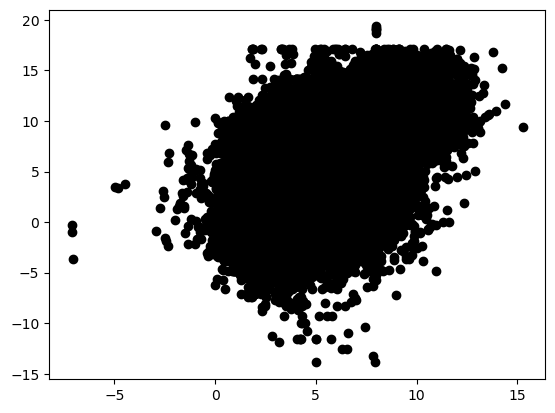

In [134]:
regr_mlp3 = MLPRegressor(random_state=1, activation='relu', solver='adam', hidden_layer_sizes=(50,))
regr_mlp3.fit(X_train_mini, y_train)
regr_mlp3.score(X_train_mini, y_train)
regr_mlp3.score(X_test_mini, y_test)
y_pred = regr_mlp3.predict(X_test_mini)
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [135]:
regr_mlp3.score(X_train_mini, y_train)


0.31052735034684975

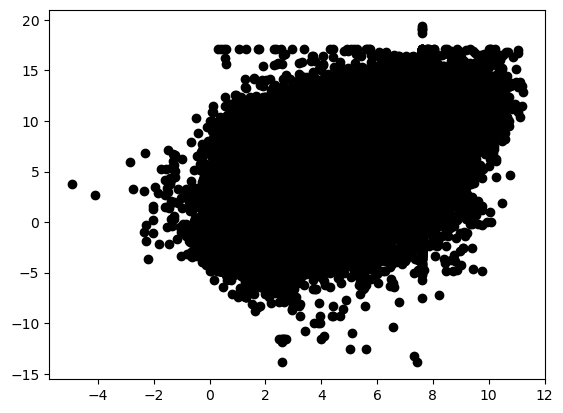

In [136]:
regr_mlp3 = MLPRegressor(random_state=1, activation='relu', solver='adam', hidden_layer_sizes=(30,30))
regr_mlp3.fit(X_train_mini, y_train)
regr_mlp3.score(X_train_mini, y_train)
regr_mlp3.score(X_test_mini, y_test)
y_pred = regr_mlp3.predict(X_test_mini)
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [137]:
regr_mlp3.score(X_test_mini, y_test)


0.23400552376465944

In [138]:
regr_mlp3.score(X_train_mini, y_train)


0.23359444561096465

/Users/alexandermuratov/miniconda3/envs/funz/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


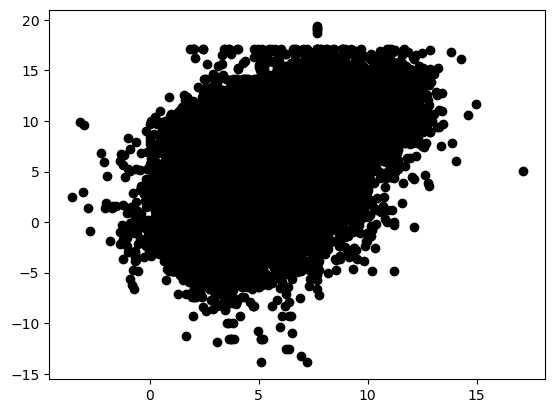

In [139]:
regr_mlp3 = MLPRegressor(random_state=1, activation='relu', solver='adam', hidden_layer_sizes=(200,))
regr_mlp3.fit(X_train_mini, y_train)
regr_mlp3.score(X_train_mini, y_train)
regr_mlp3.score(X_test_mini, y_test)
y_pred = regr_mlp3.predict(X_test_mini)
plt.plot(y_pred, y_test, 'ok')
plt.show()

In [140]:
regr_mlp3.score(X_train_mini, y_train)


0.31726713910586035

In [141]:
regr_mlp3.score(X_test_mini, y_test)


0.3163768905540585

kiba_score_estimated


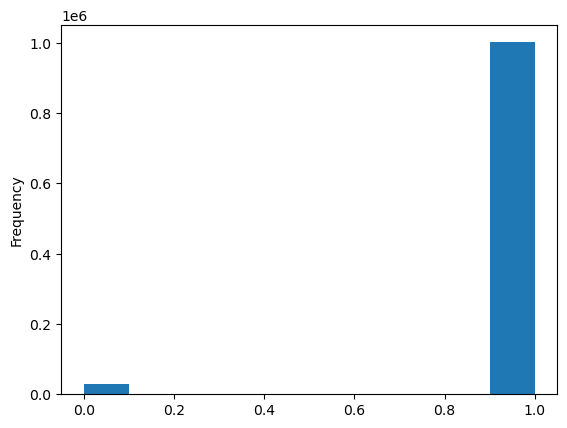

Length


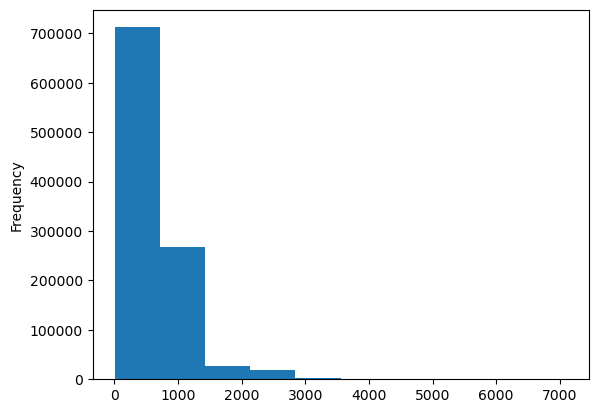

Mass


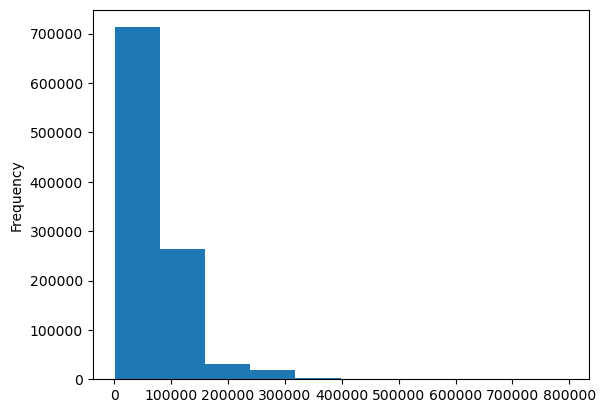

Annotation


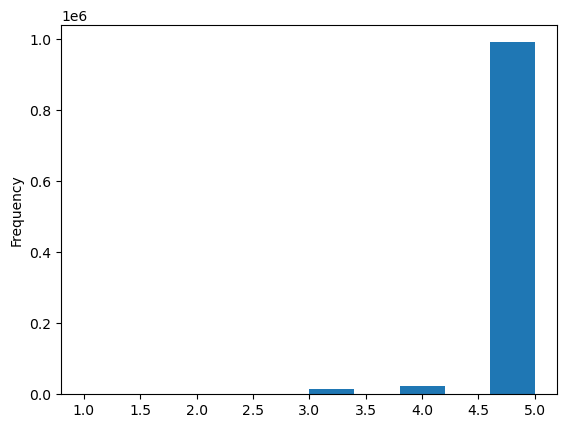

Beta strand


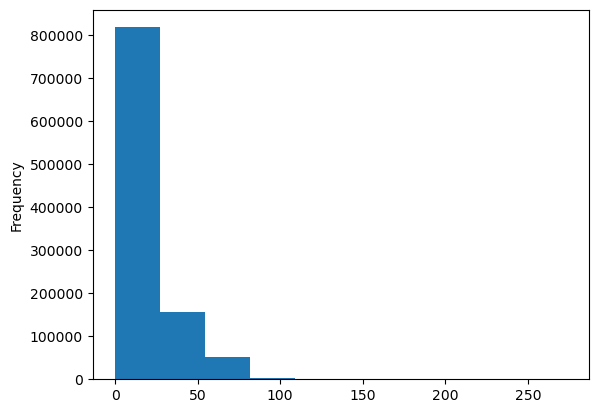

Chain


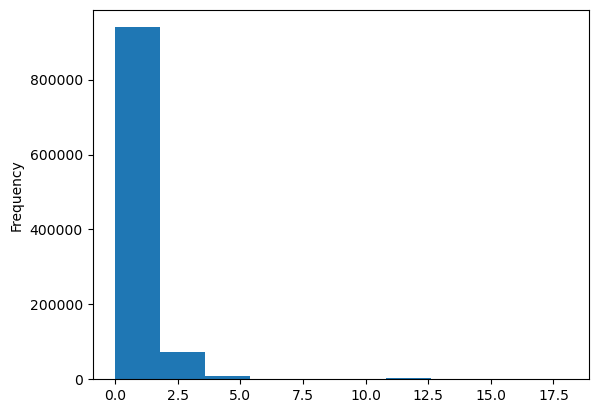

Disulfide bond


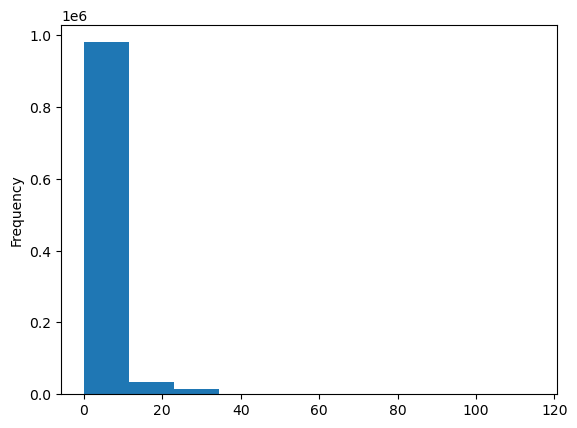

Domain


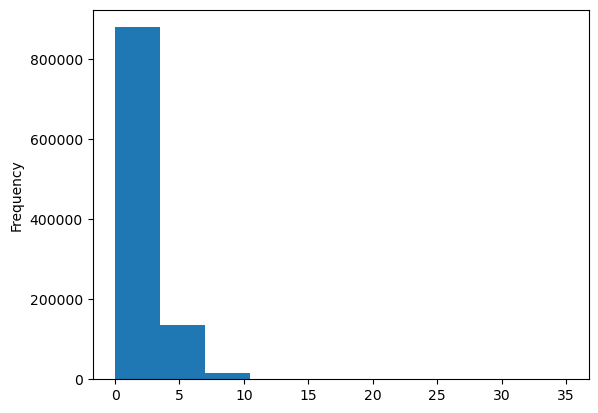

Glycosylation


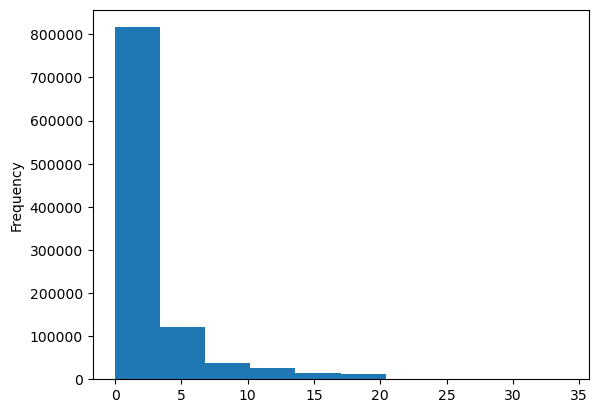

Helix


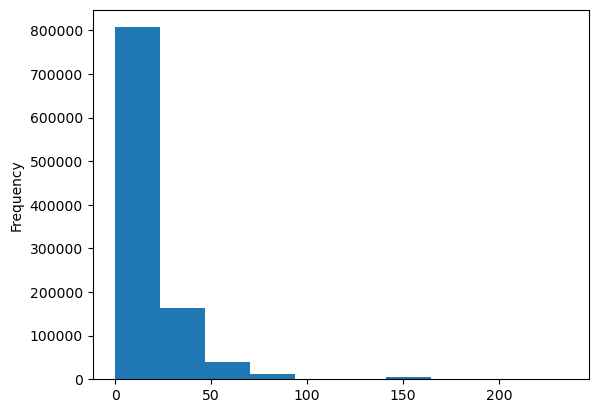

Signal


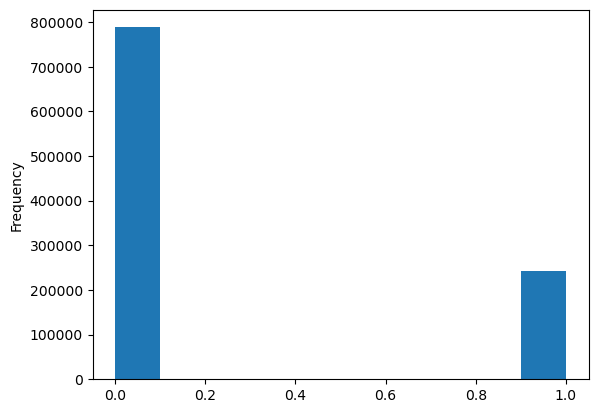

Active site


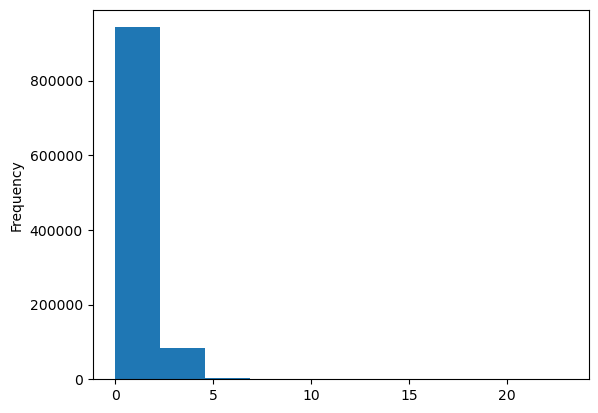

Binding site


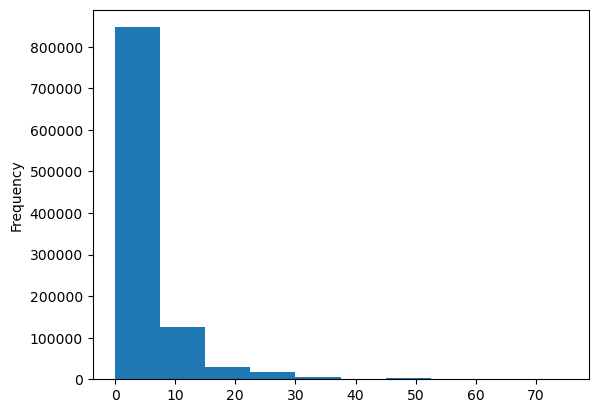

Propeptide


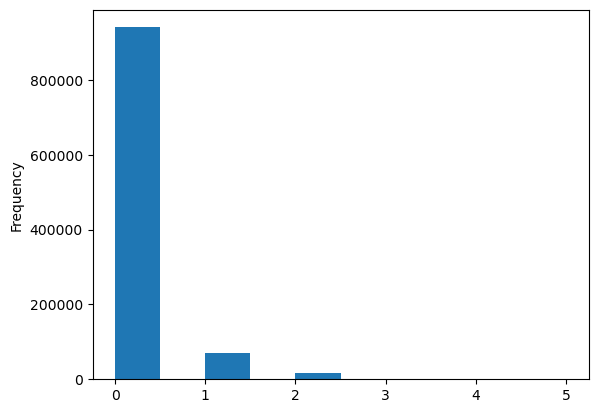

Region


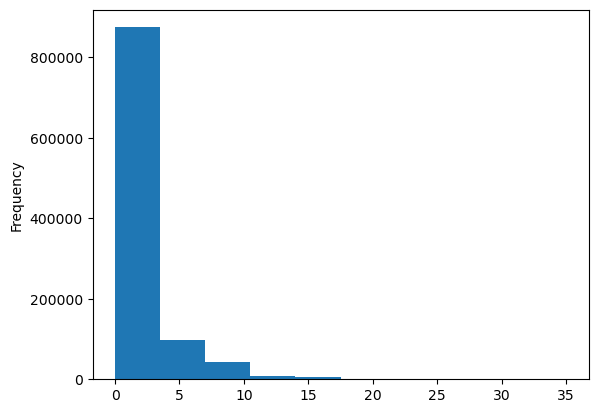

DNA binding


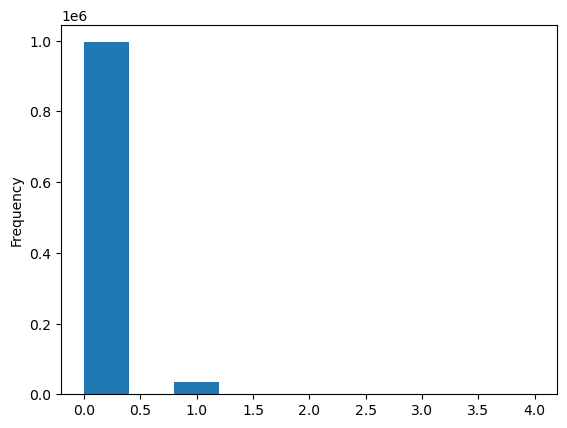

Site


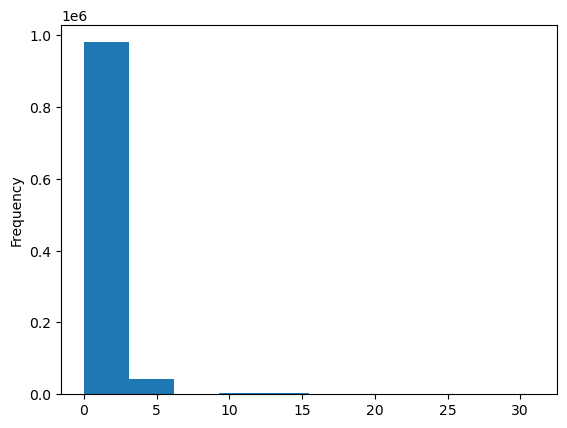

Topological domain


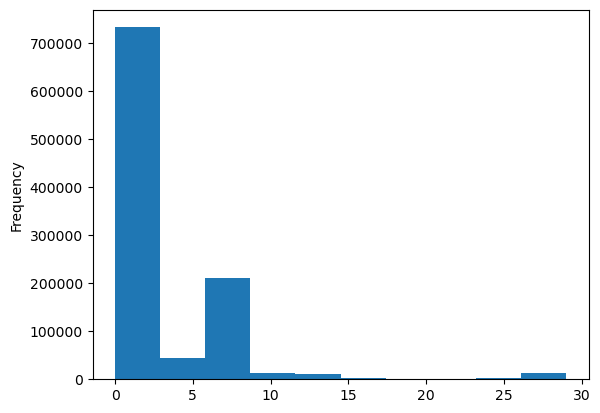

Transmembrane


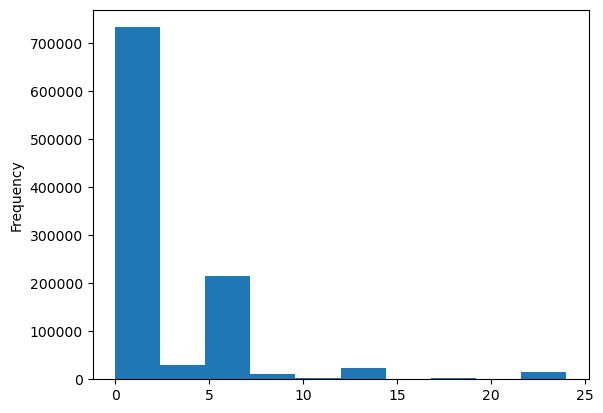

Alternative sequence


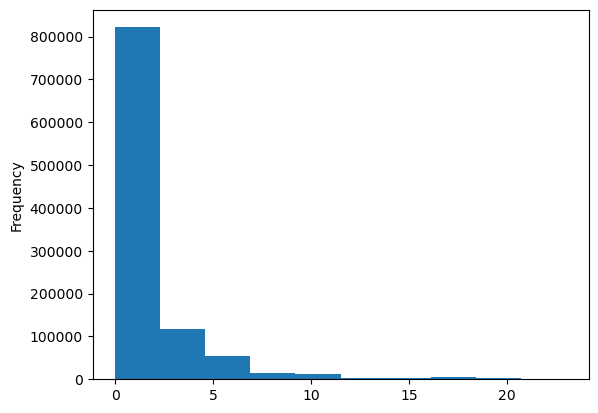

Compositional bias


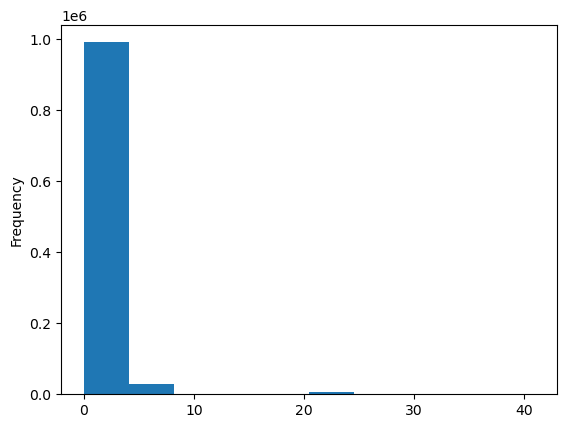

Intramembrane


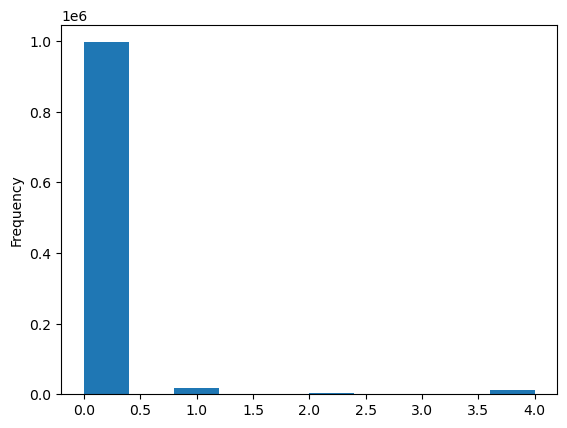

Repeat


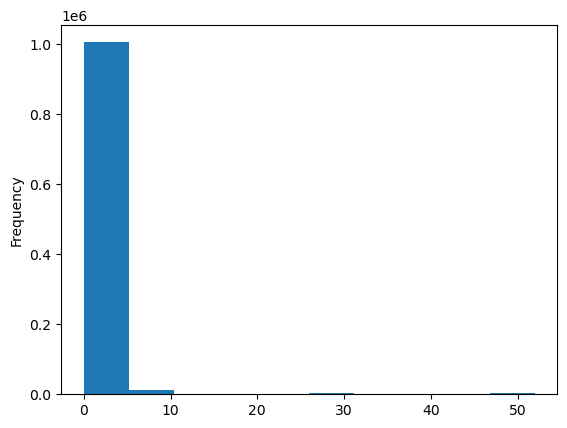

Sequence conflict


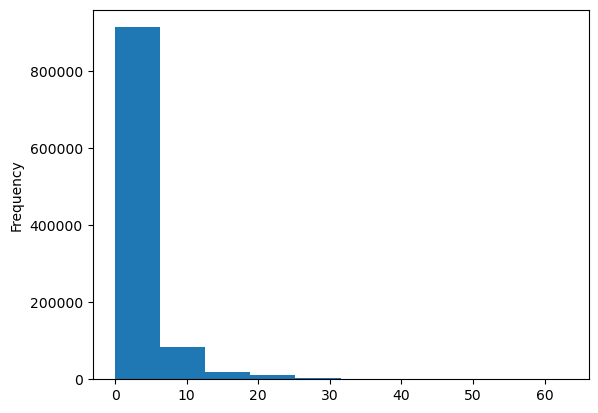

Coiled coil


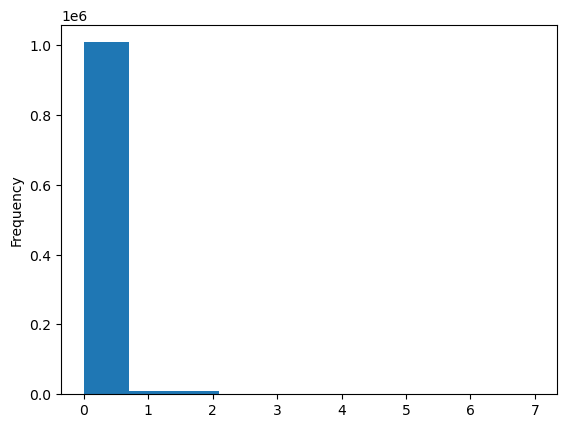

Natural variant


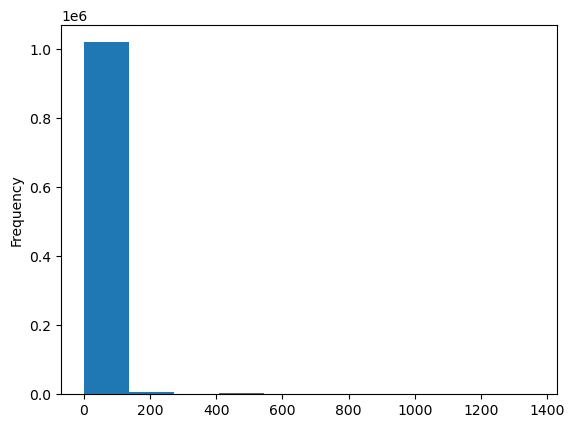

Modified residue


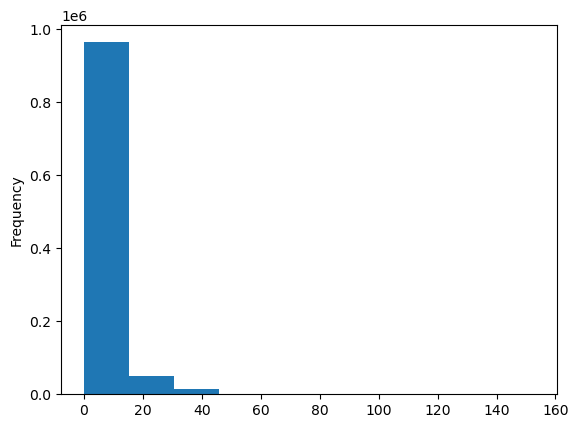

Mutagenesis


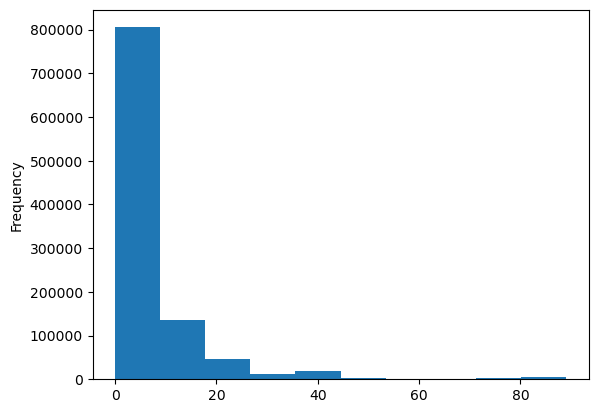

Transit peptide


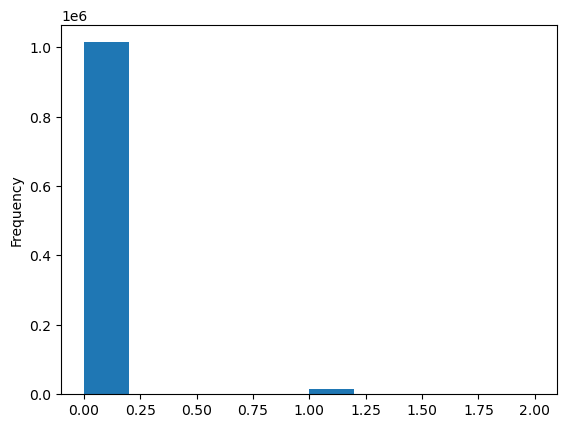

Motif


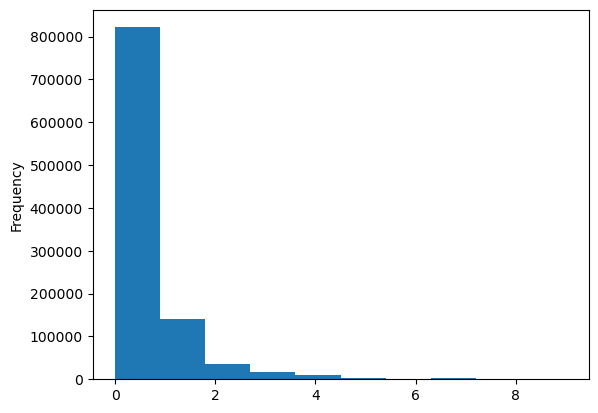

Zinc finger


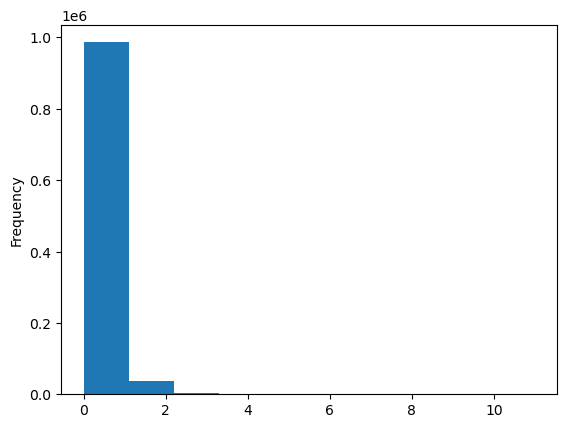

Turn


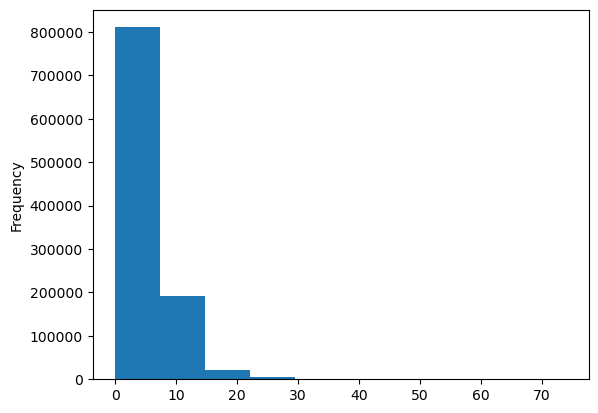

Initiator methionine


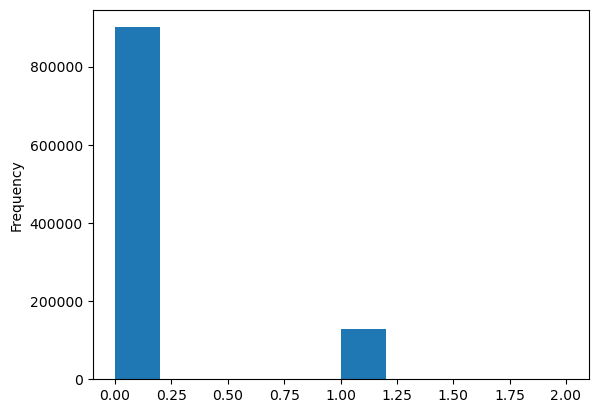

Lipidation


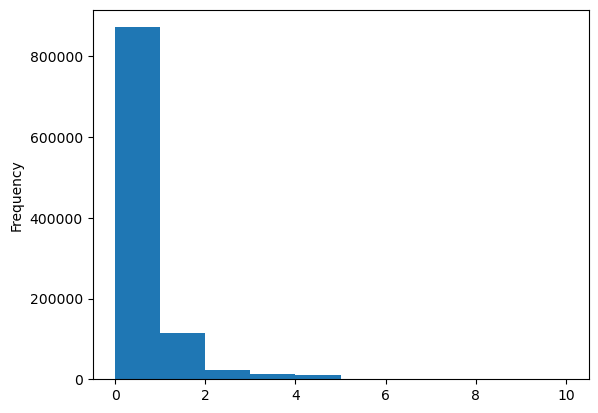

Peptide


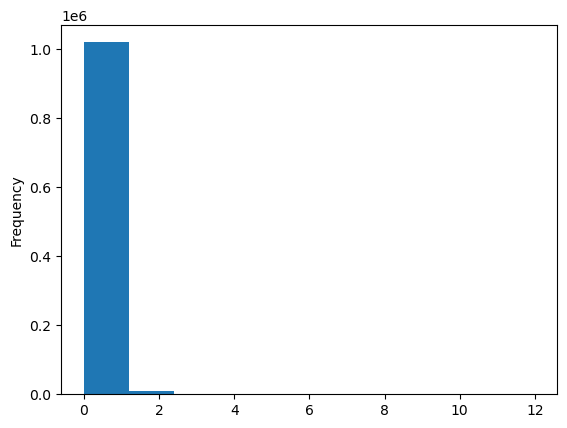

Sequence uncertainty


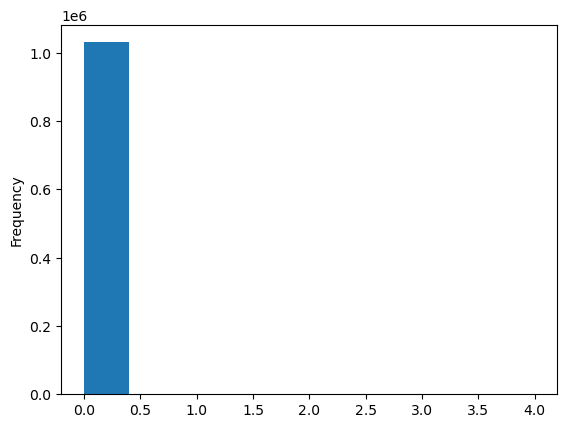

A


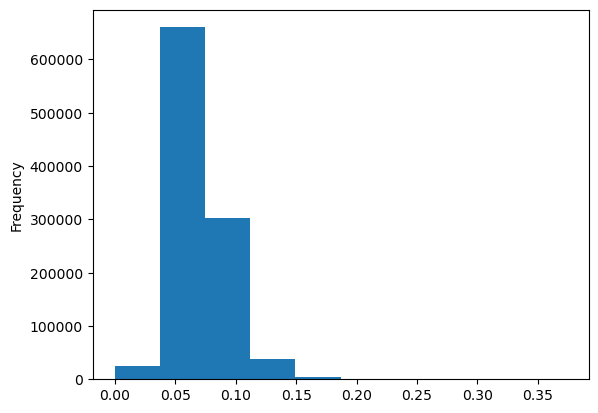

C


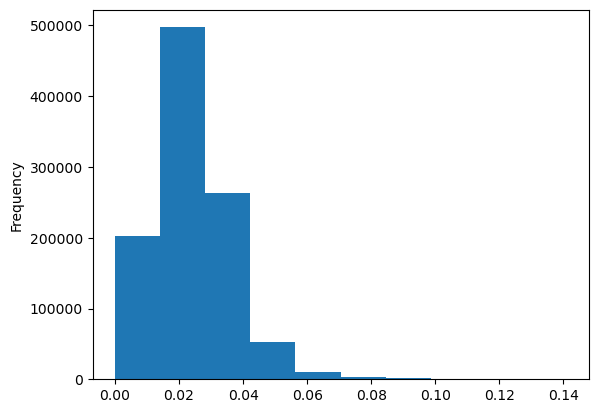

D


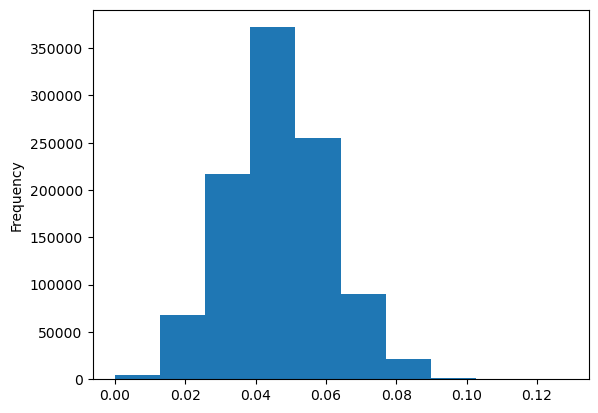

E


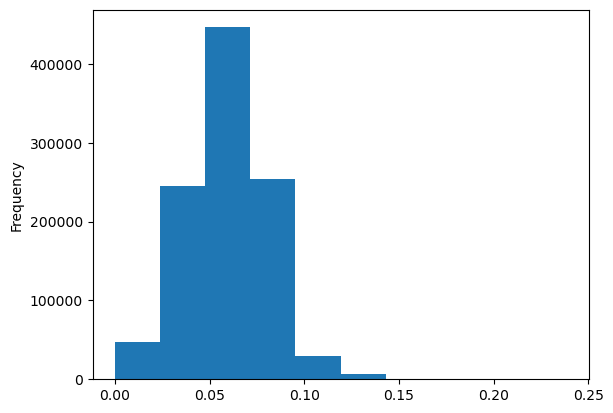

F


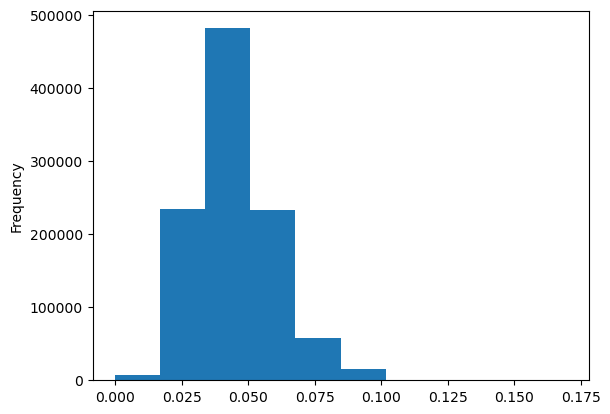

G


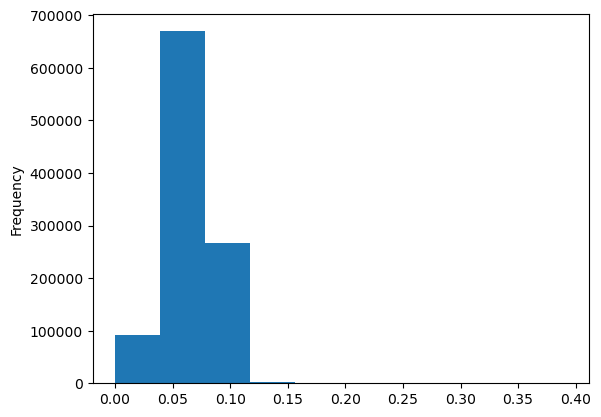

H


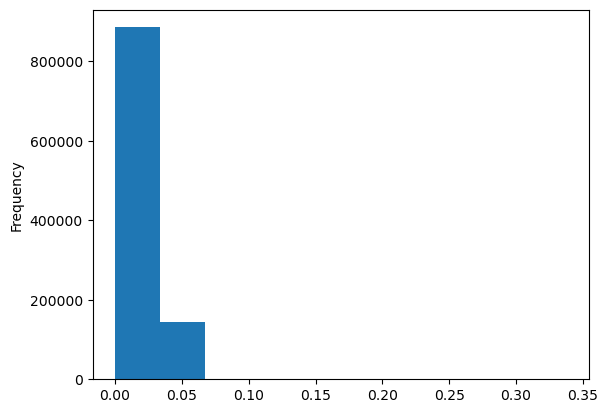

I


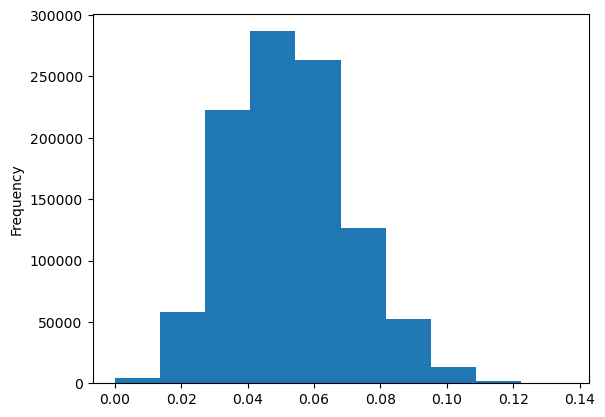

K


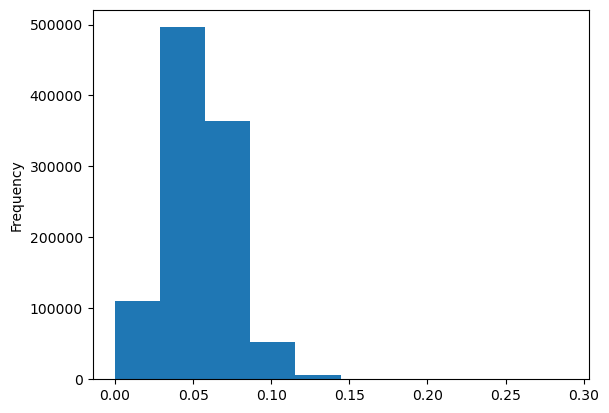

L


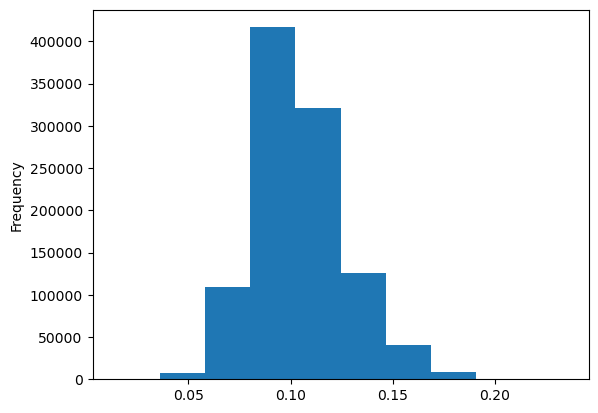

M


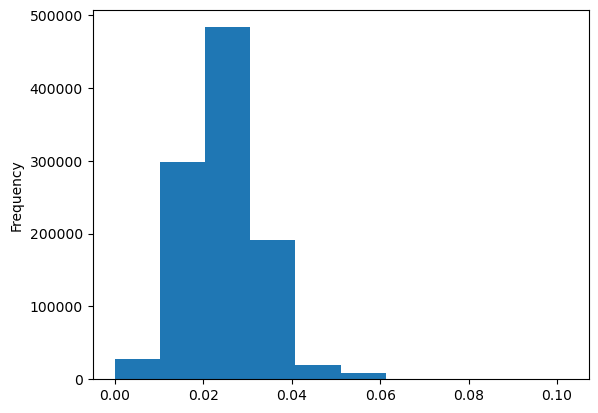

N


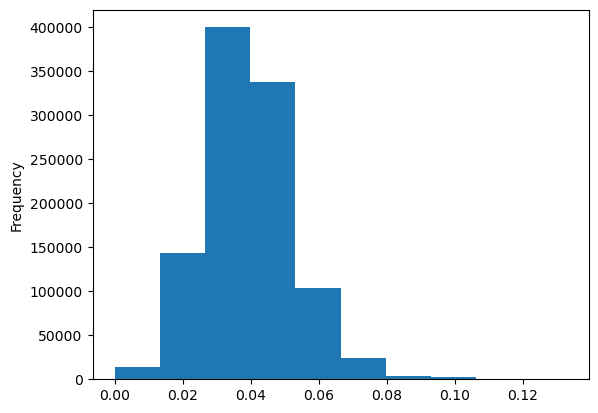

P


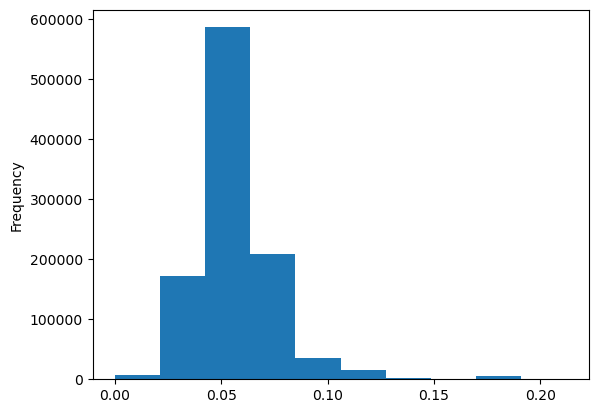

Q


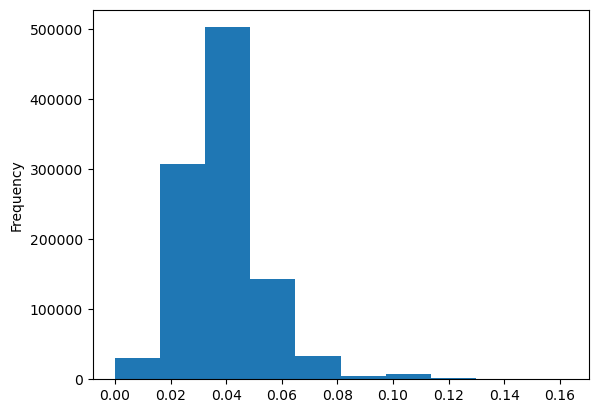

R


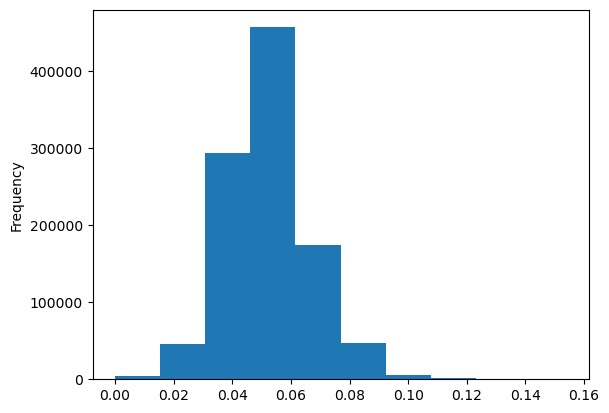

S


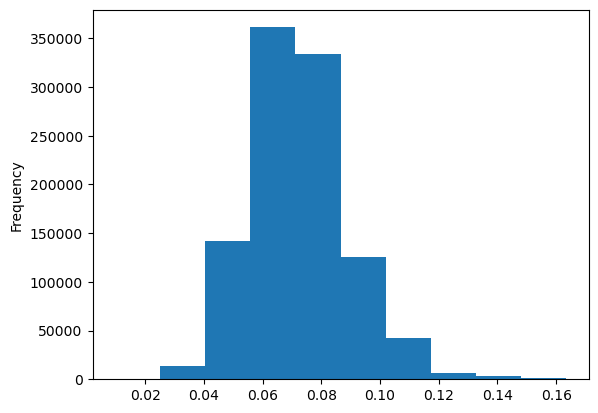

T


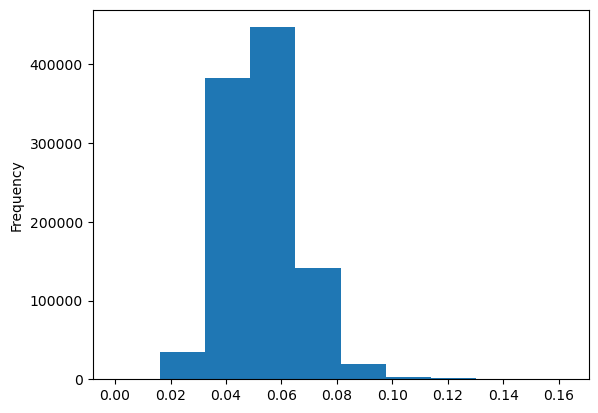

V


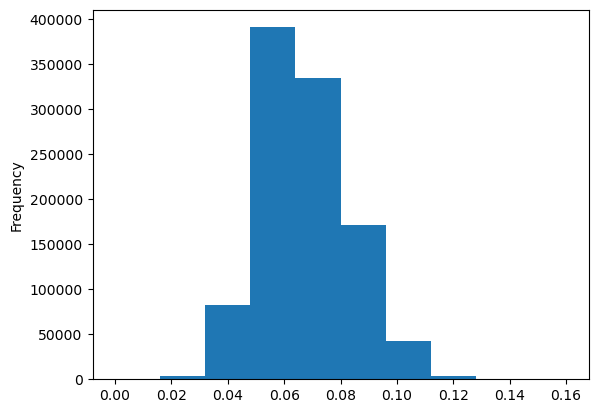

W


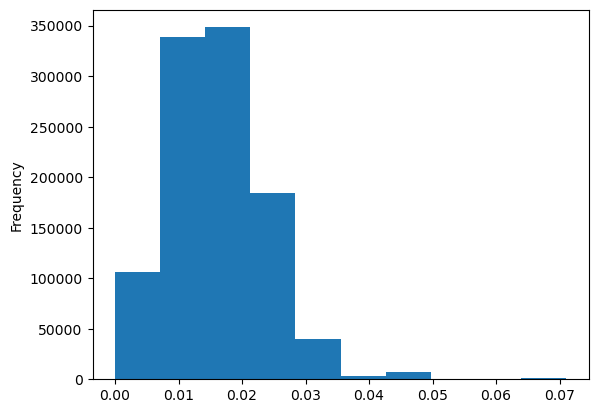

Y


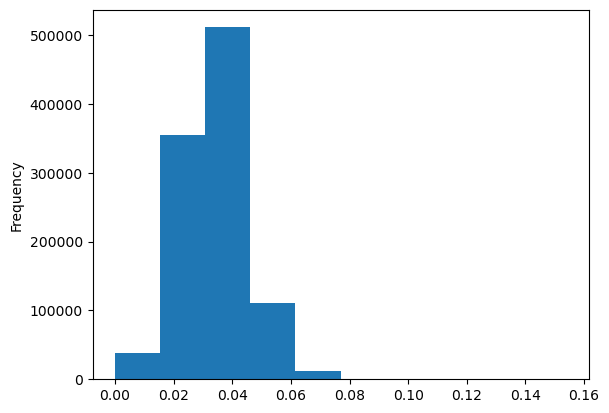

protein_seq_molecular_weight


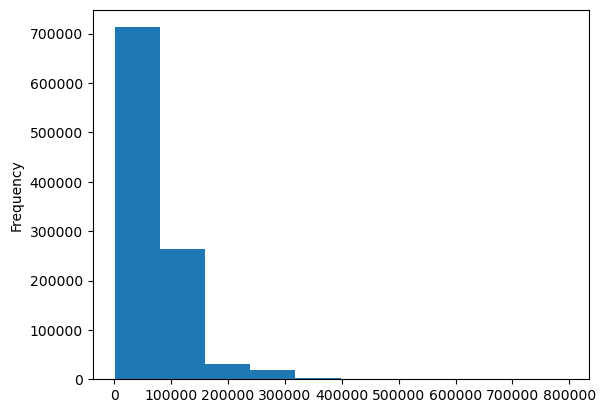

protein_seq_pI


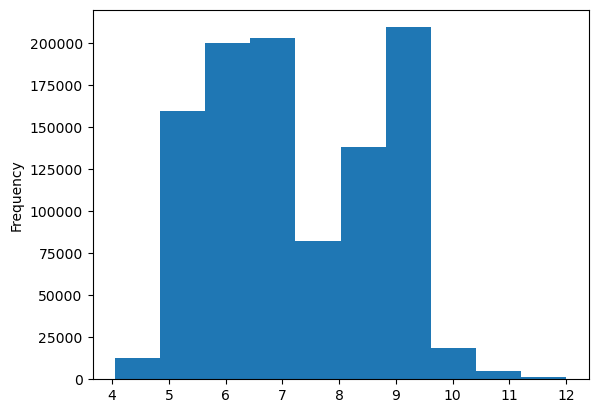

protein_seq_aromaticity


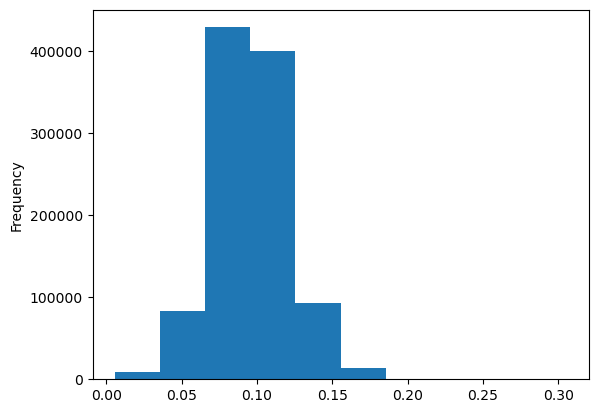

protein_seq_instability_index


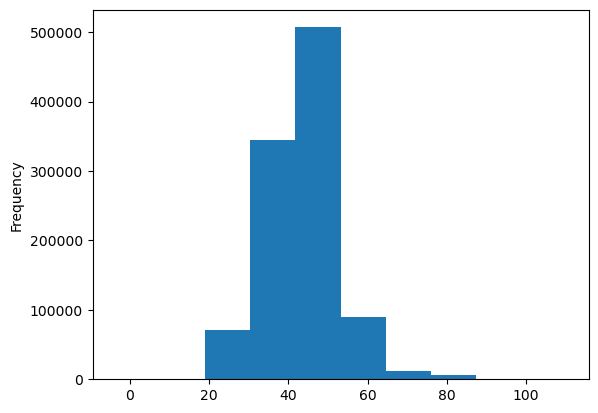

protein_seq_gravy


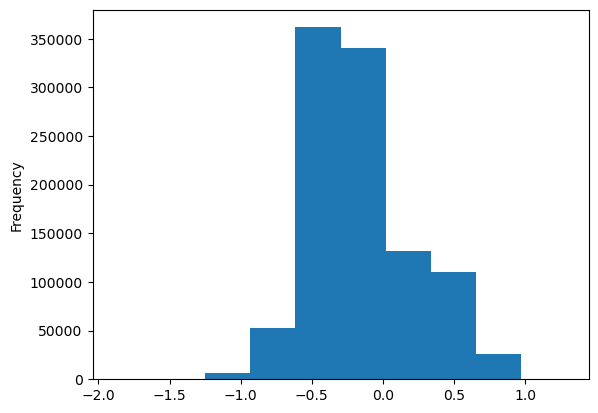

protein_seq_struct_fraction_helix


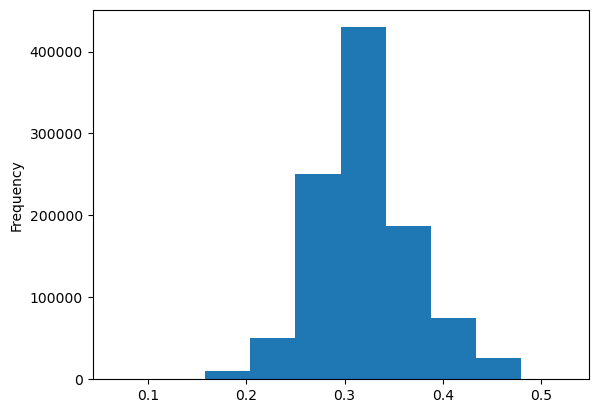

protein_seq_struct_fraction_turn


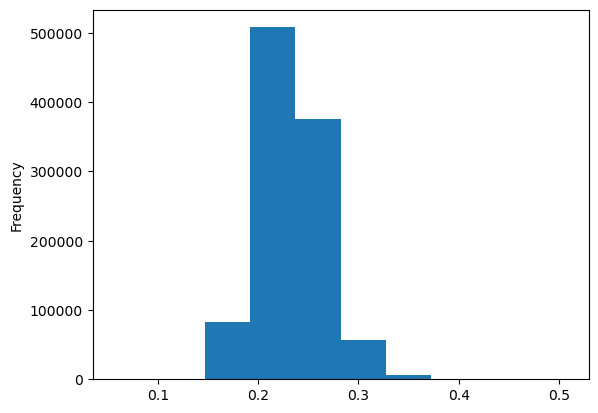

protein_seq_struct_fraction_sheet


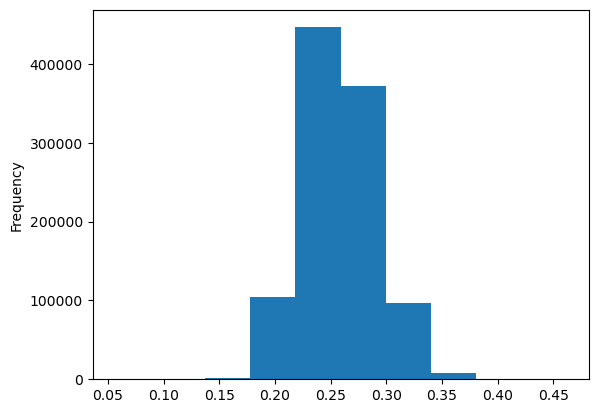

mw


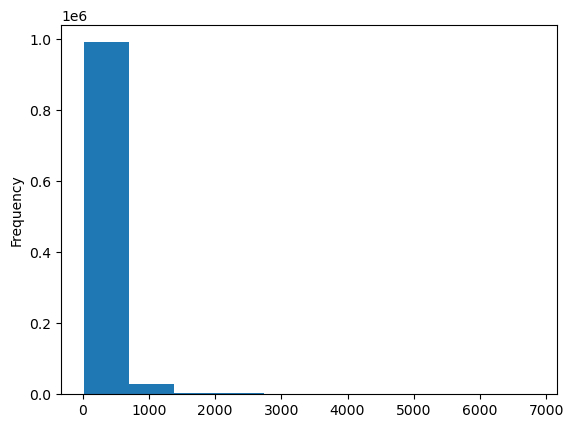

polararea


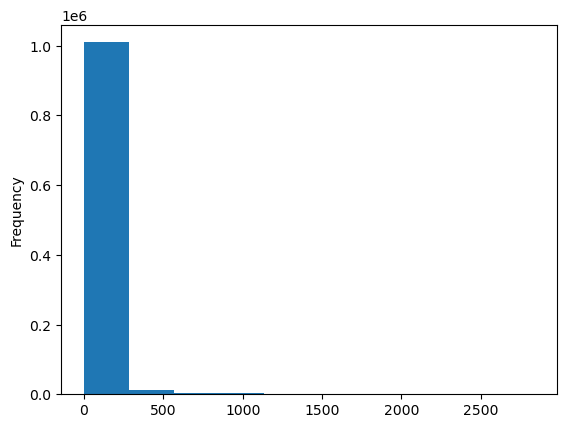

complexity


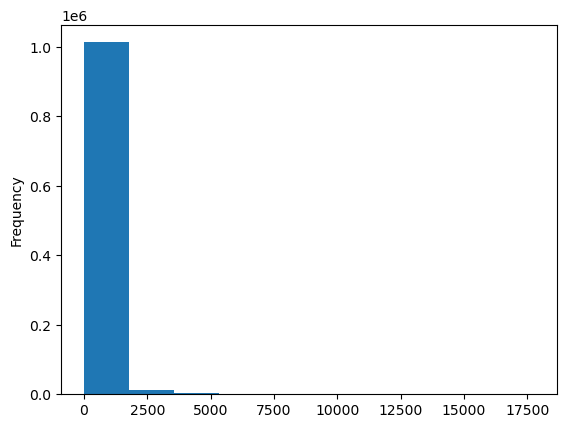

xlogp


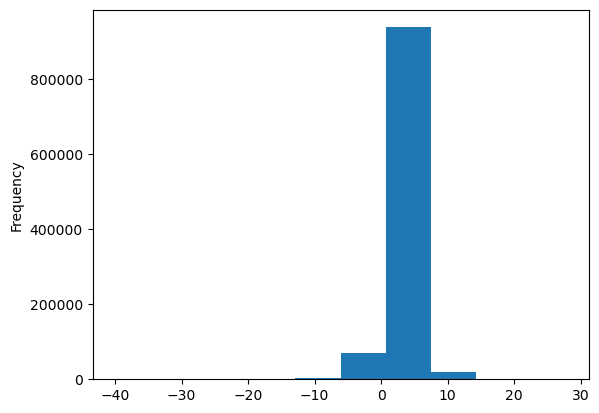

heavycnt


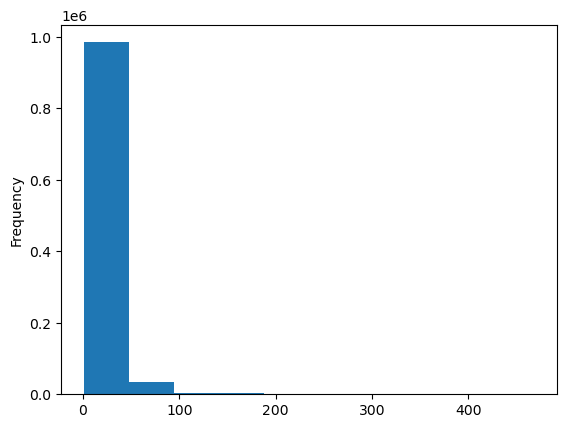

hbonddonor


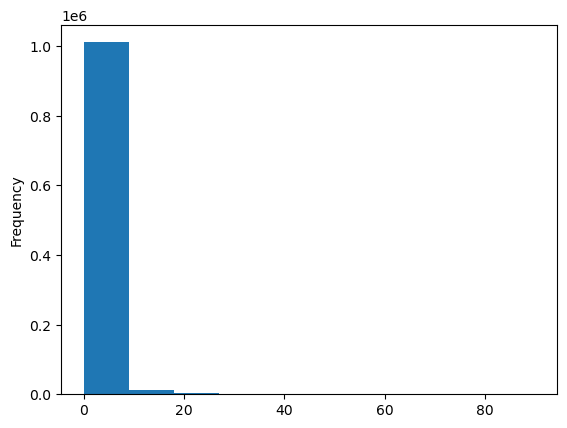

hbondacc


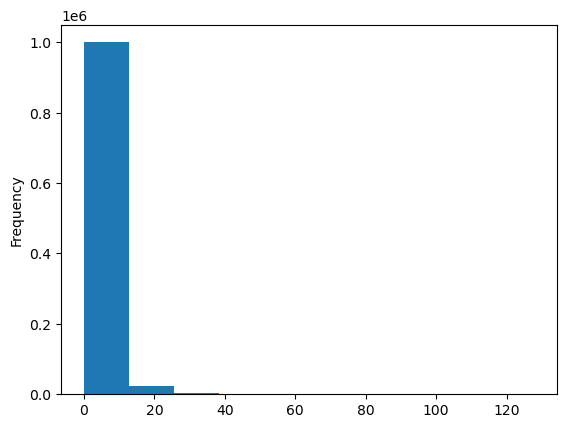

rotbonds


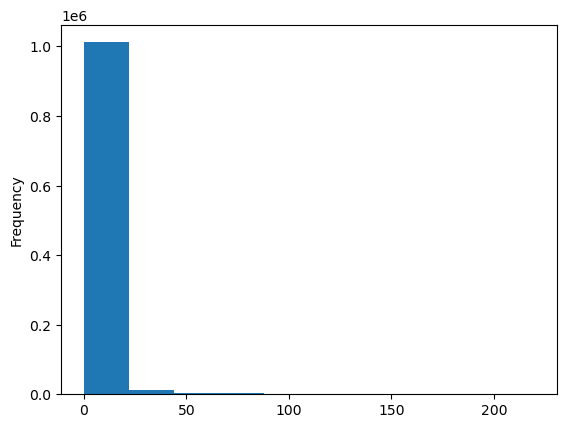

exactmass


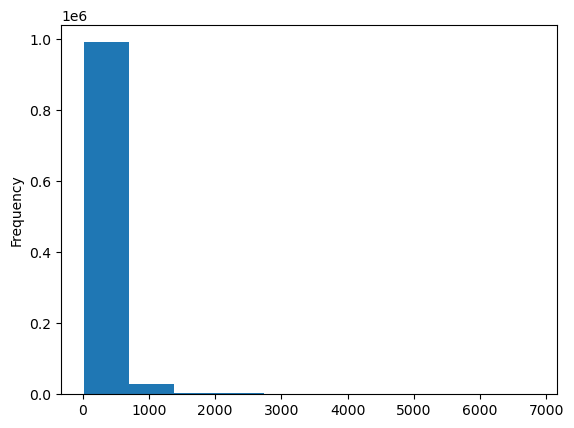

monoisotopicmass


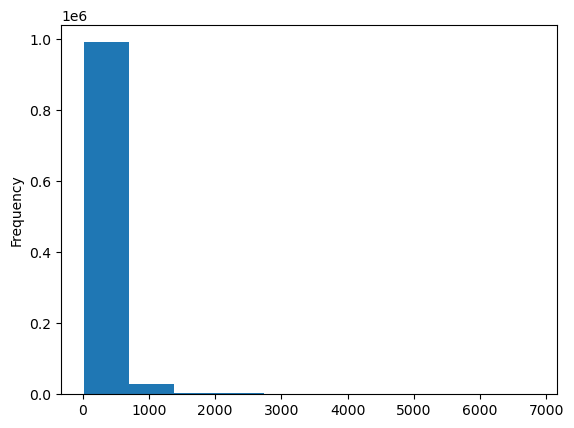

charge


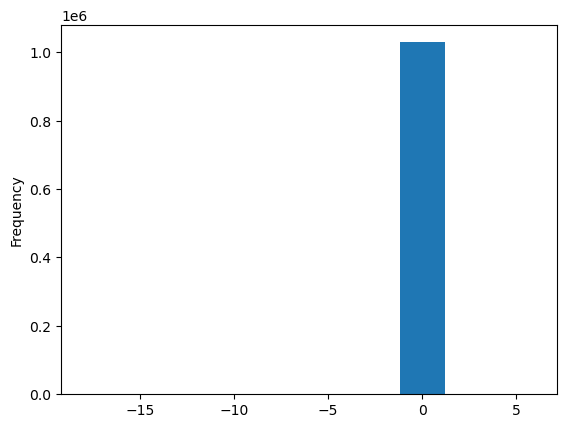

covalentunitcnt


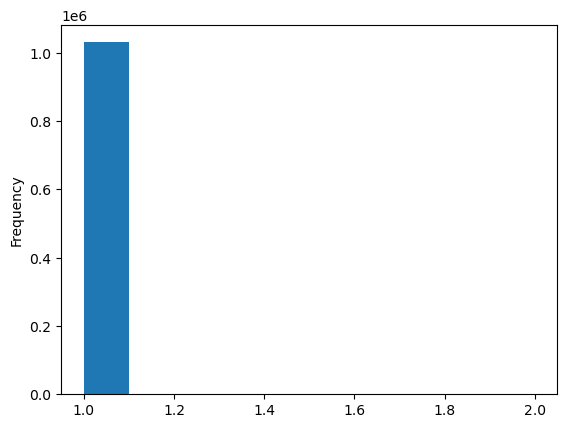

isotopeatomcnt


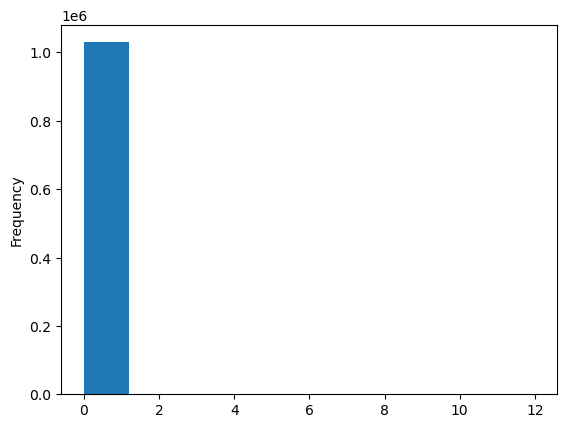

totalatomstereocnt


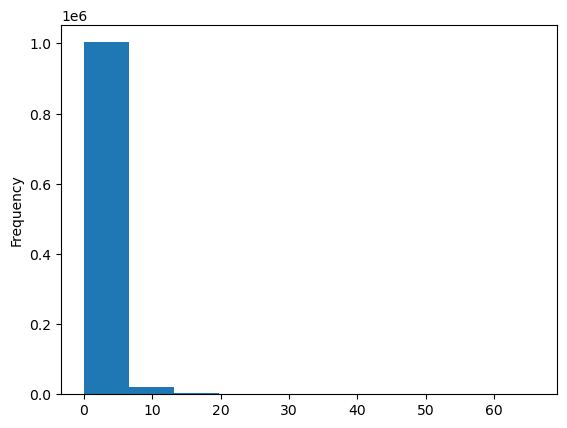

definedatomstereocnt


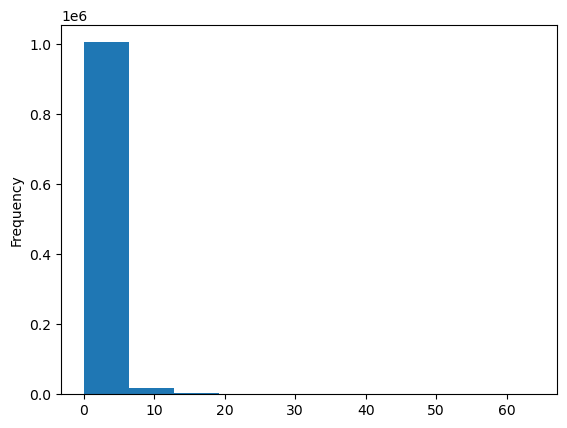

undefinedatomstereocnt


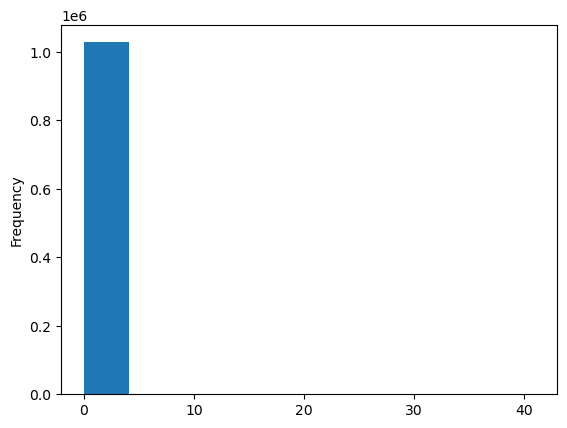

totalbondstereocnt


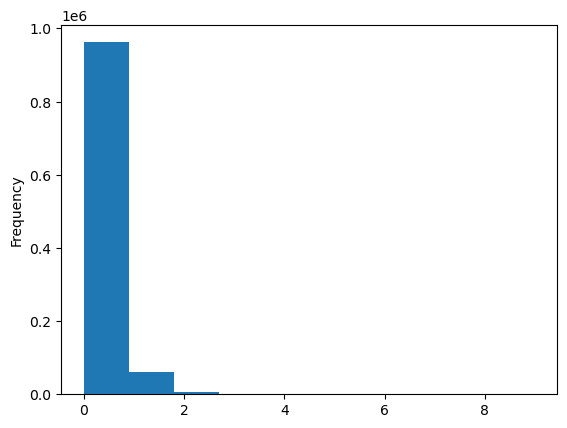

definedbondstereocnt


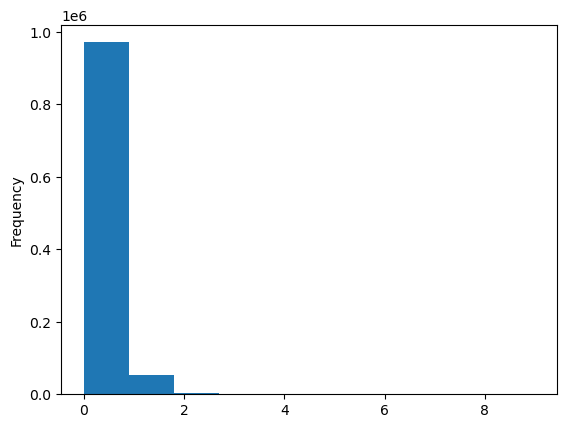

undefinedbondstereocnt


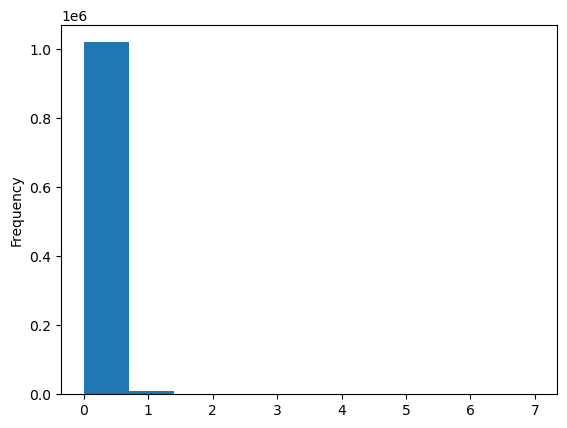

pclidcnt


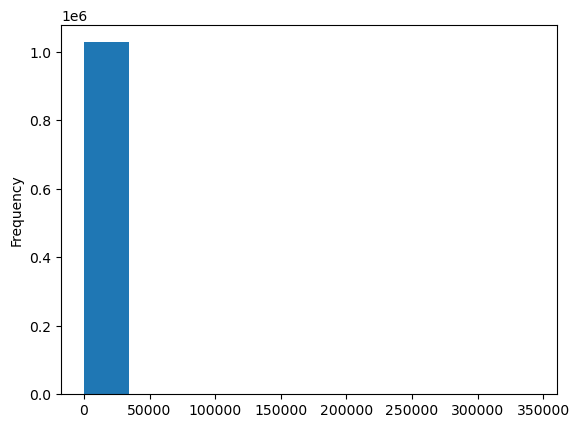

gpidcnt


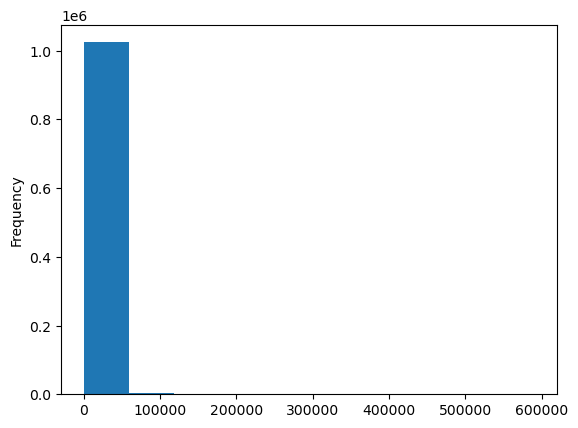

gpfamilycnt


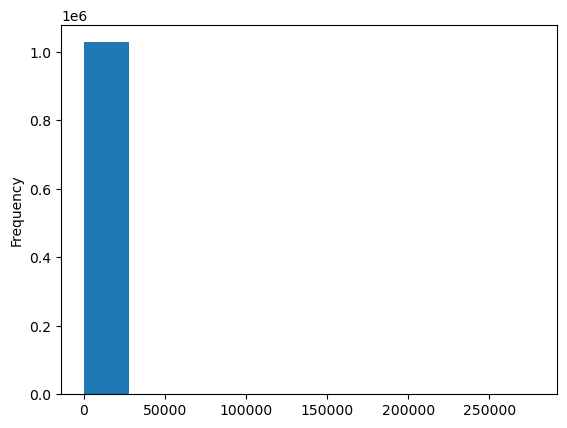

annothitcnt


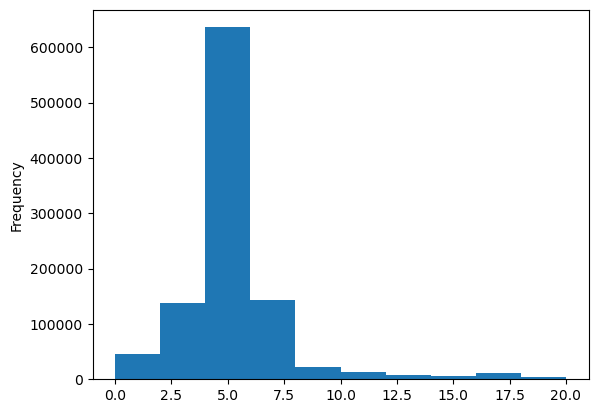

In [112]:
for feature in X.columns:
    print(feature)
    X[feature].plot.hist()
    plt.show()

kiba_score_estimated


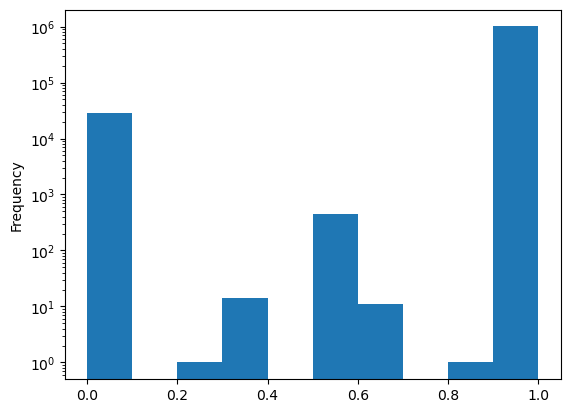

Length


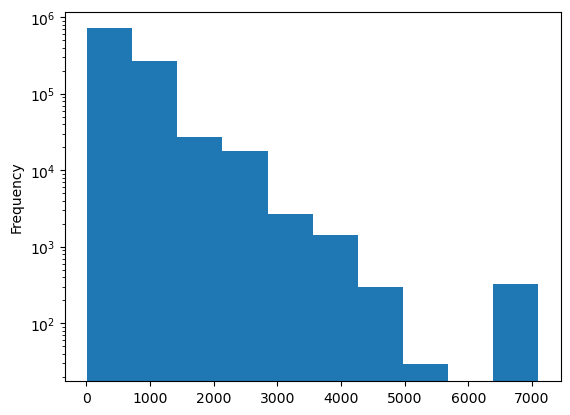

Mass


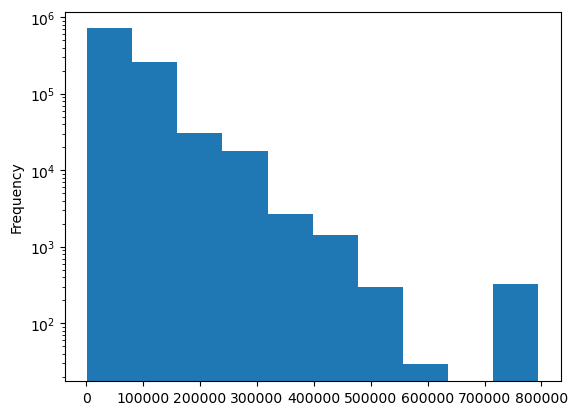

Annotation


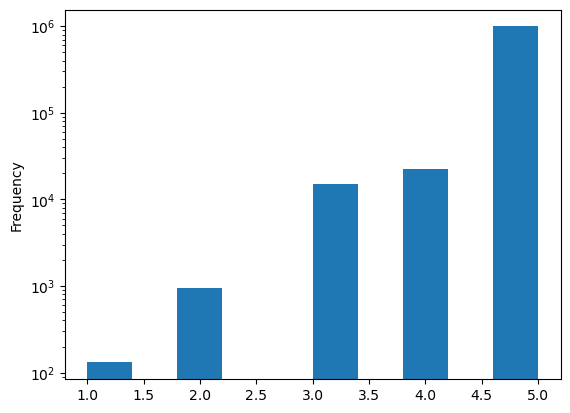

Beta strand


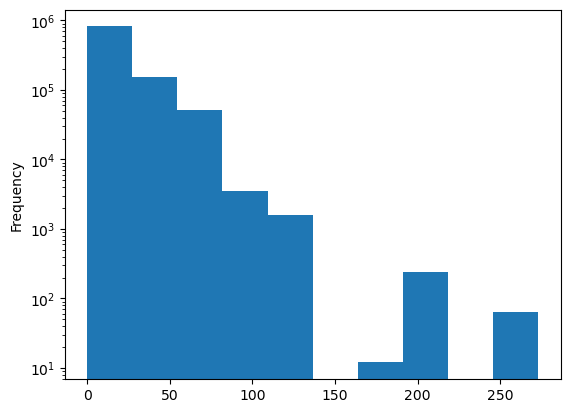

Chain


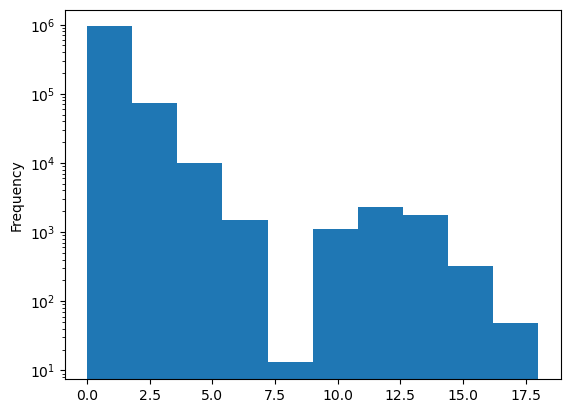

Disulfide bond


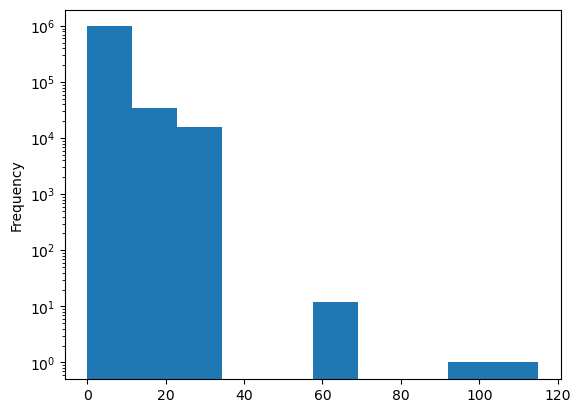

Domain


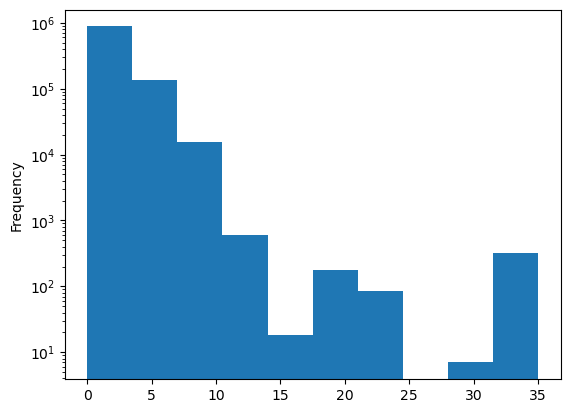

Glycosylation


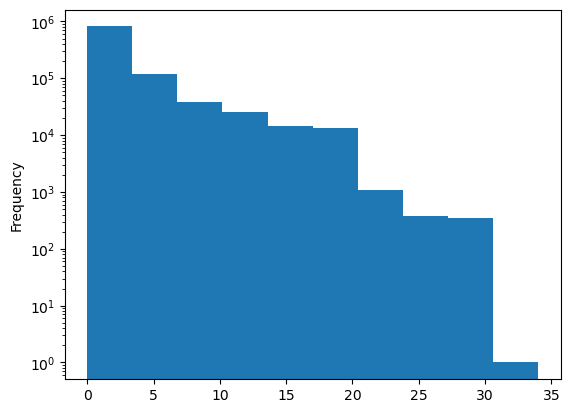

Helix


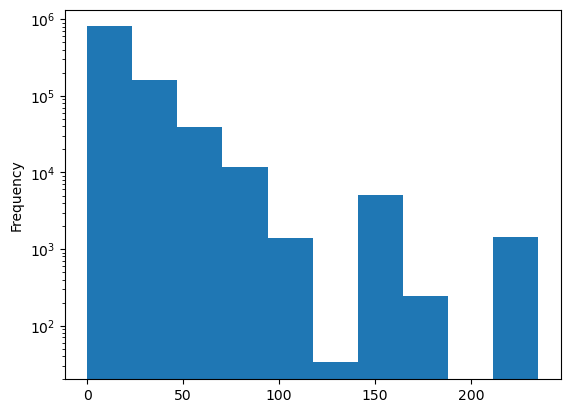

Signal


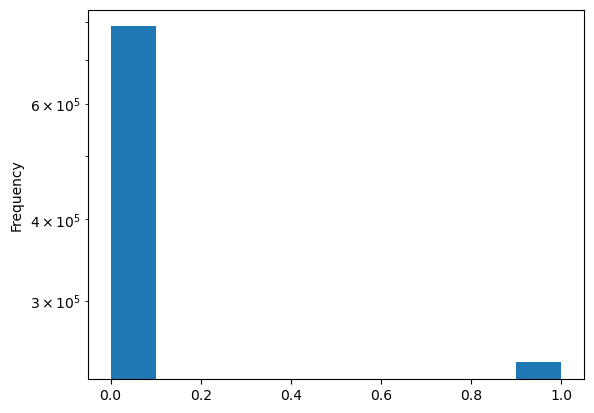

Active site


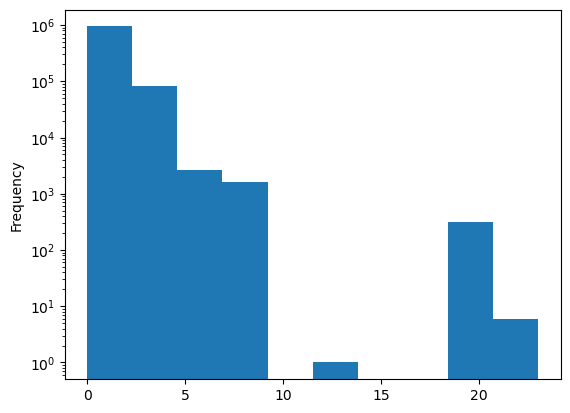

Binding site


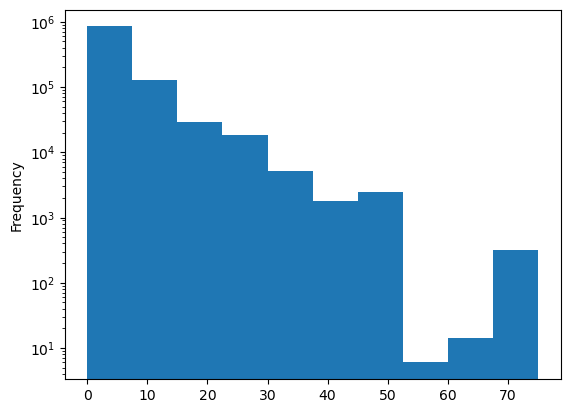

Propeptide


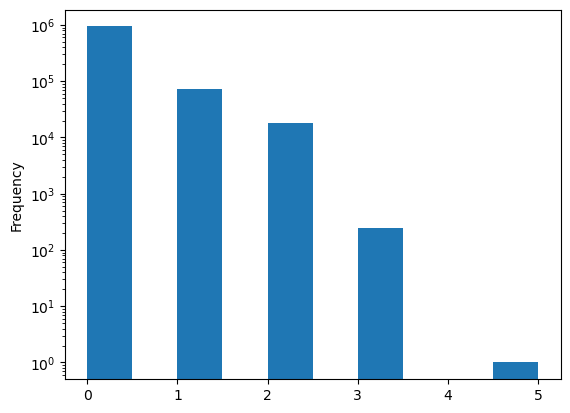

Region


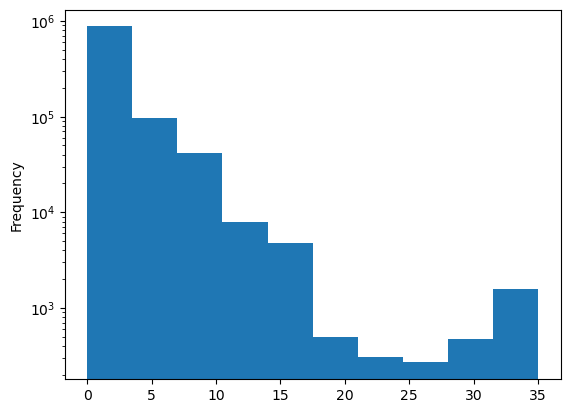

DNA binding


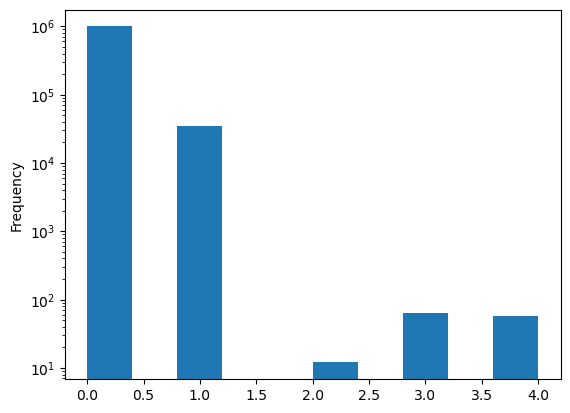

Site


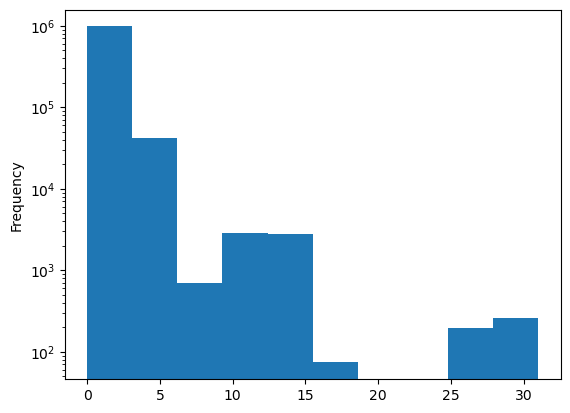

Topological domain


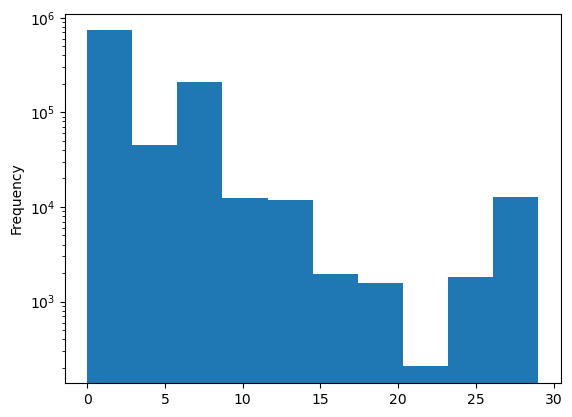

Transmembrane


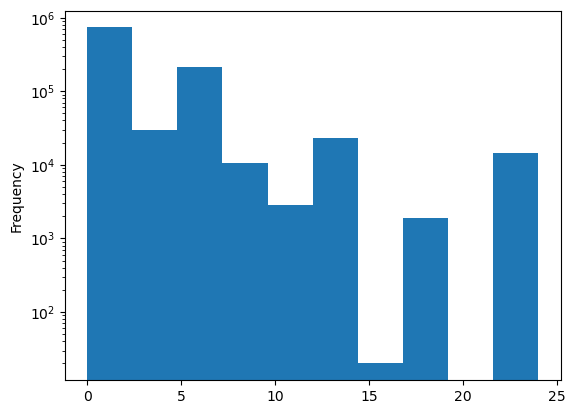

Alternative sequence


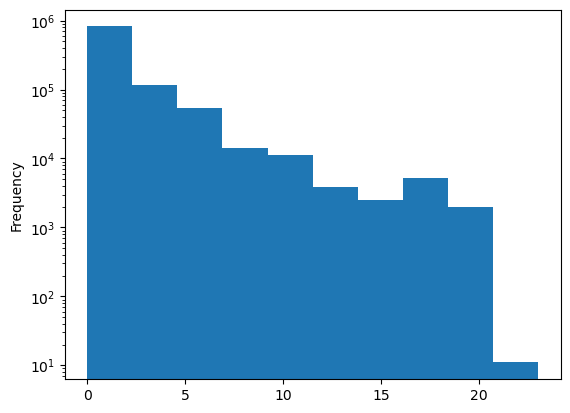

Compositional bias


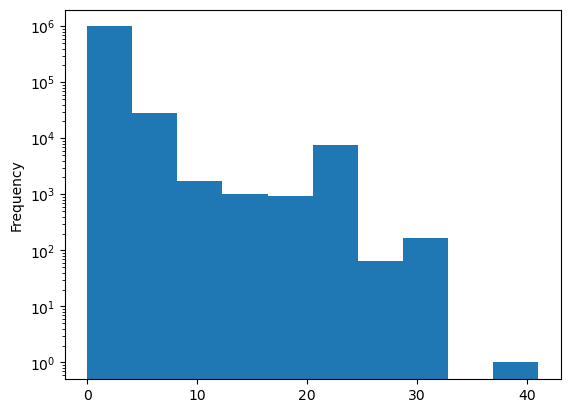

Intramembrane


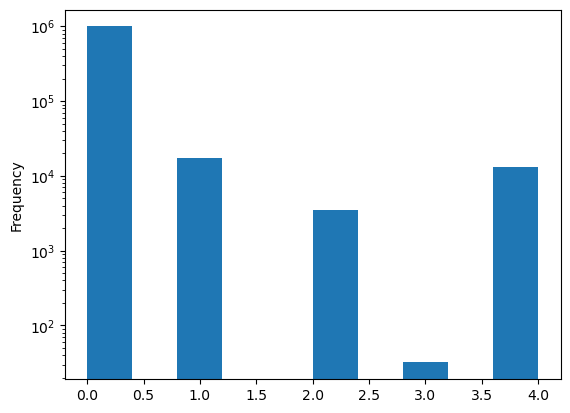

Repeat


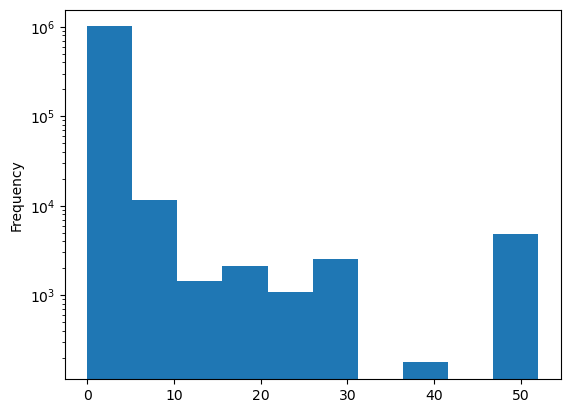

Sequence conflict


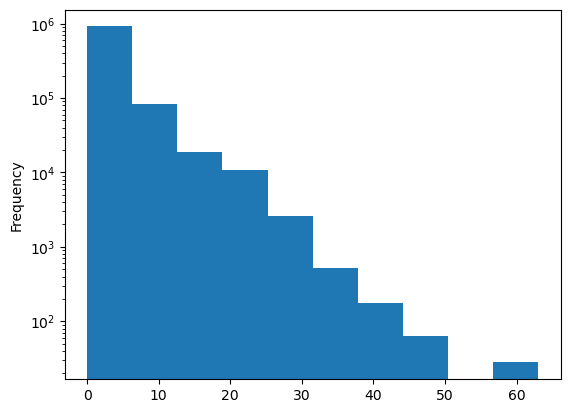

Coiled coil


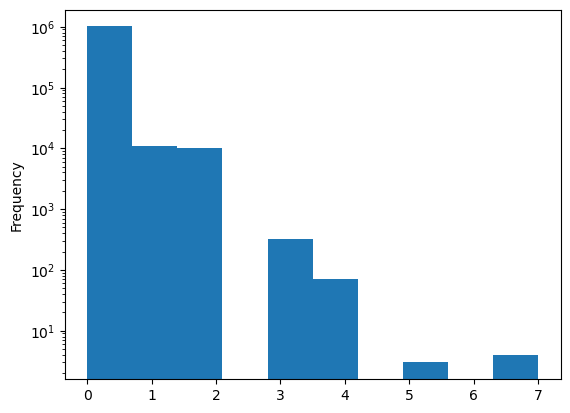

Natural variant


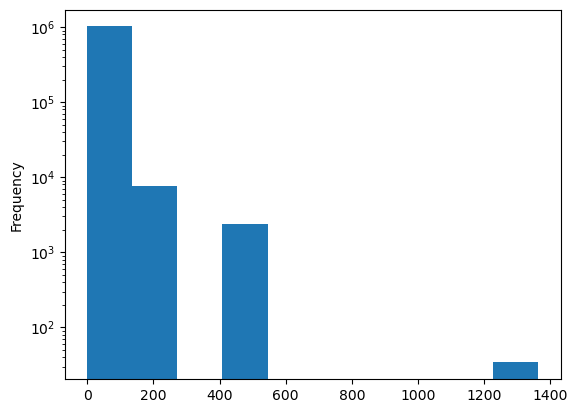

Modified residue


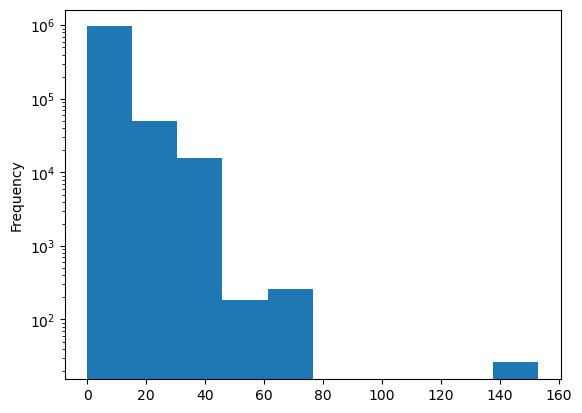

Mutagenesis


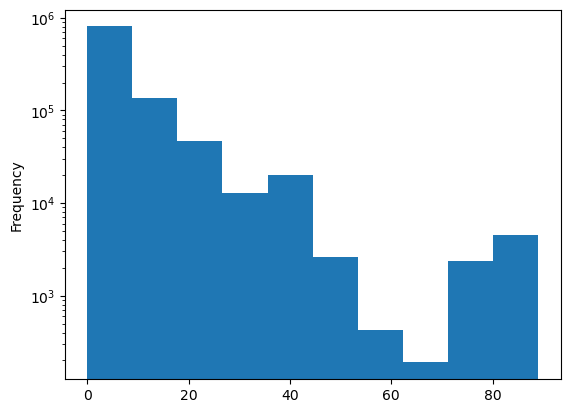

Transit peptide


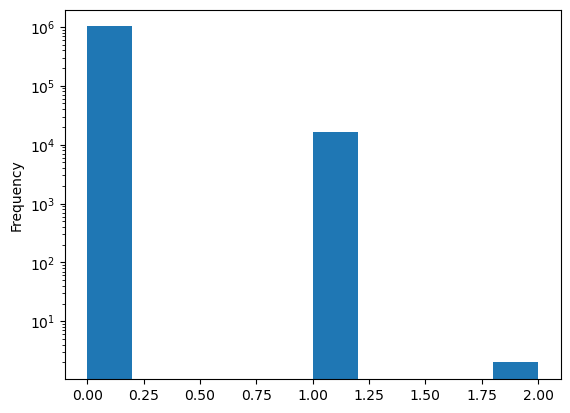

Motif


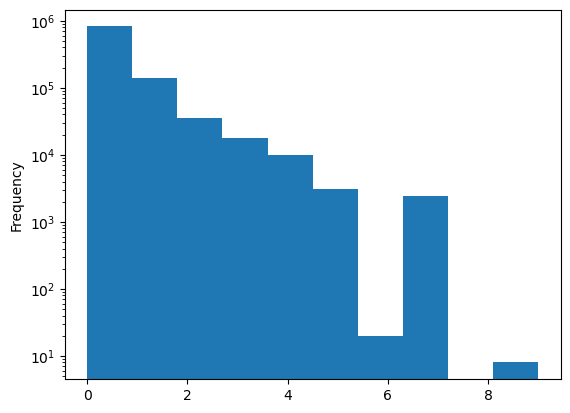

Zinc finger


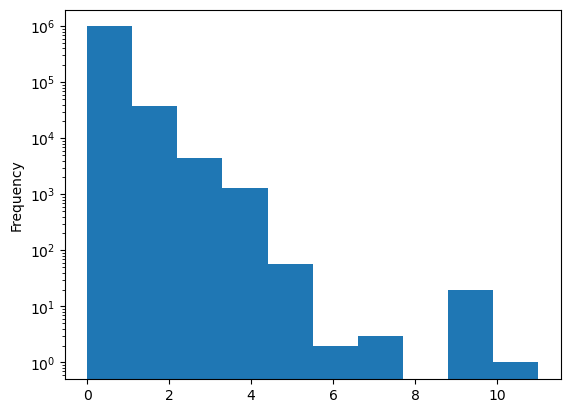

Turn


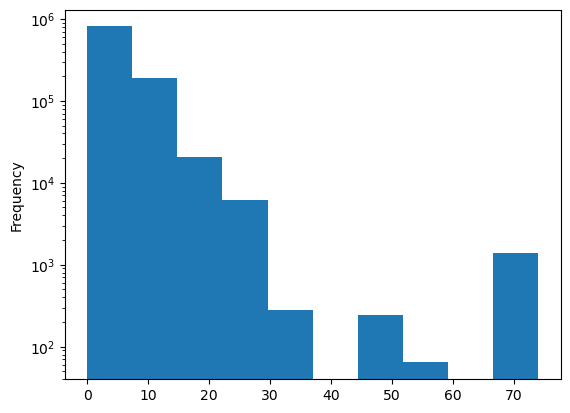

Initiator methionine


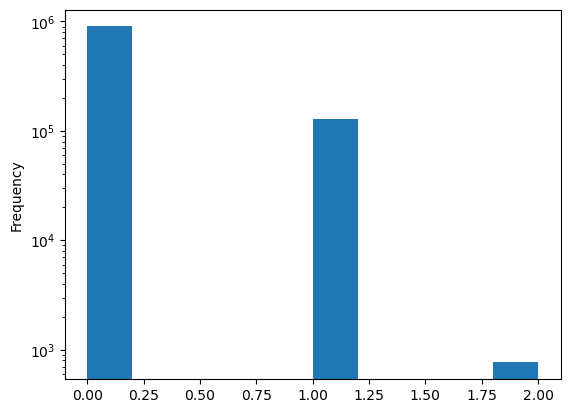

Lipidation


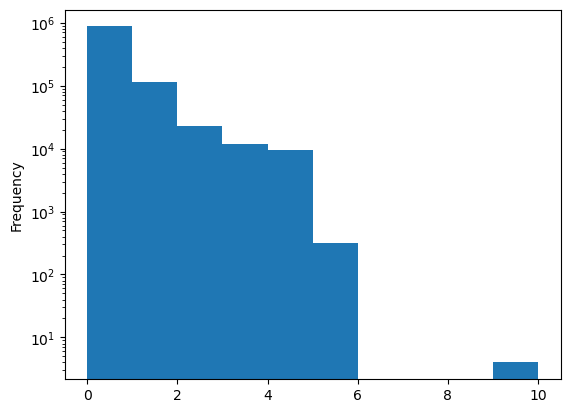

Peptide


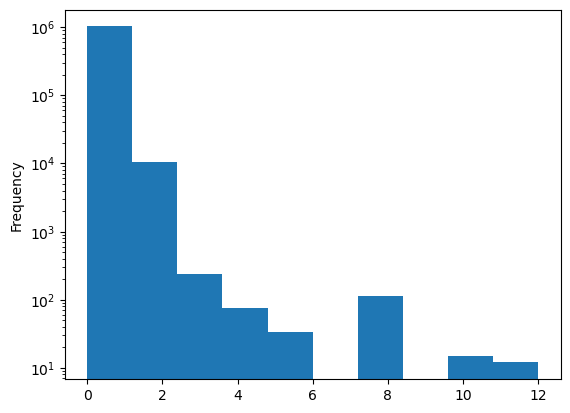

Sequence uncertainty


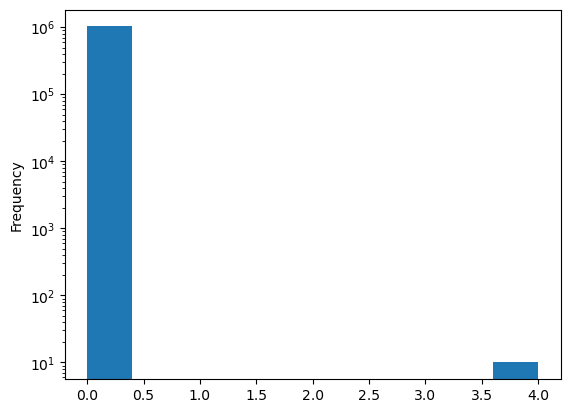

A


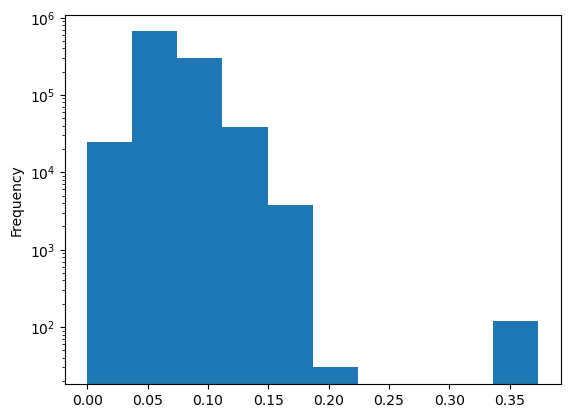

C


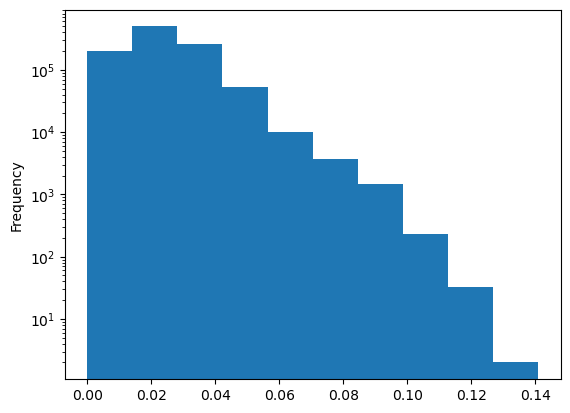

D


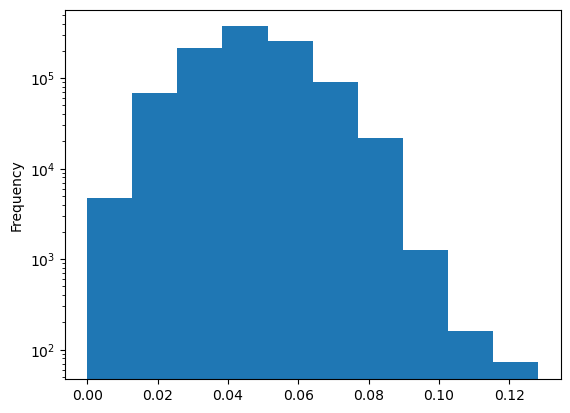

E


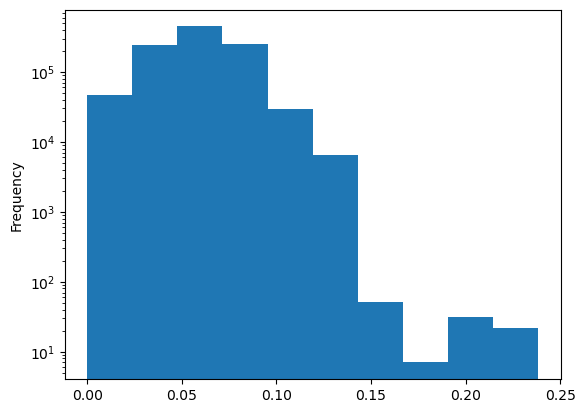

F


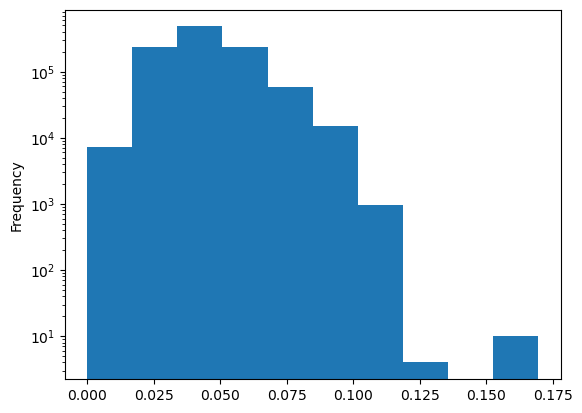

G


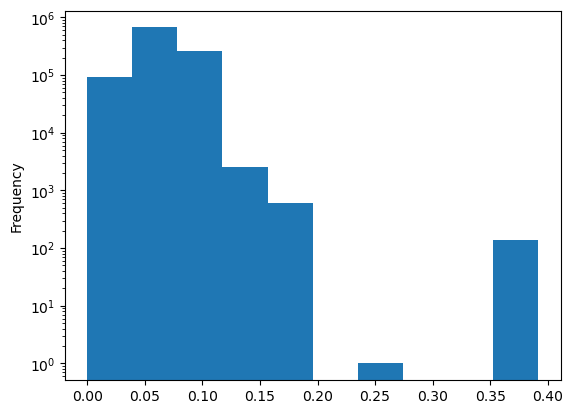

H


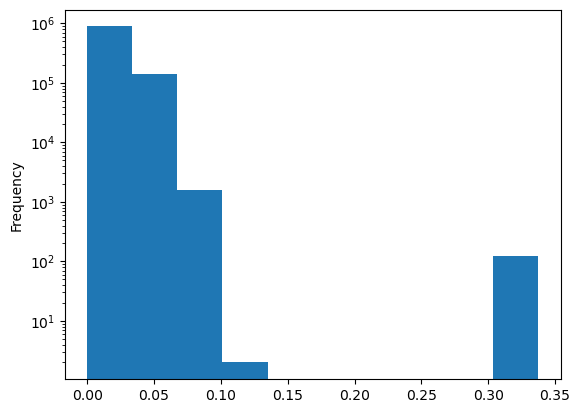

I


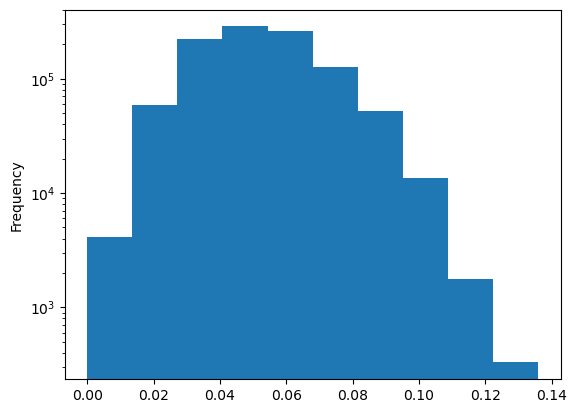

K


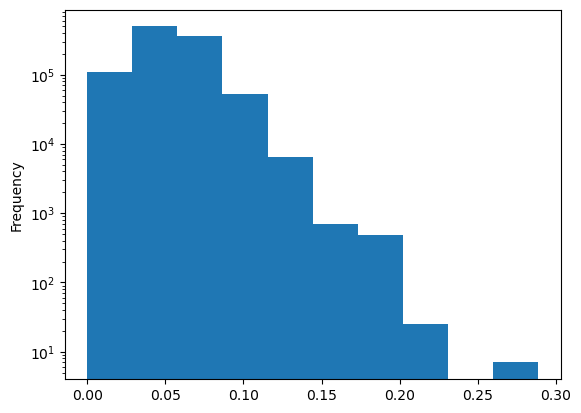

L


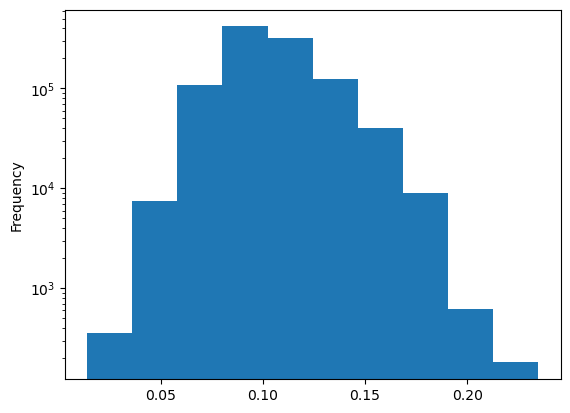

M


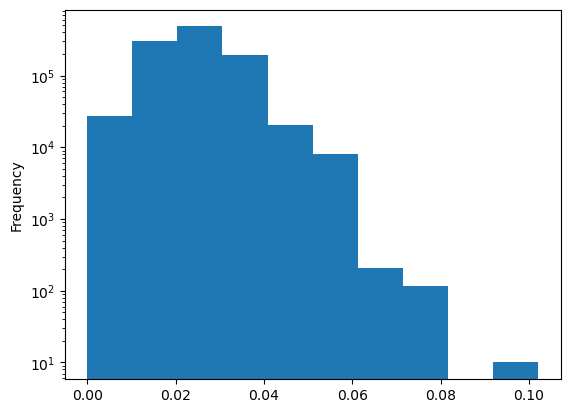

N


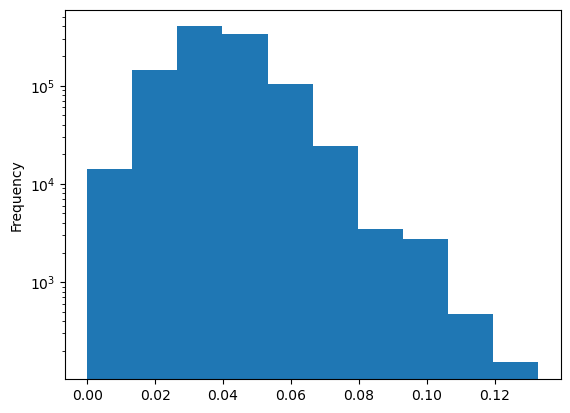

P


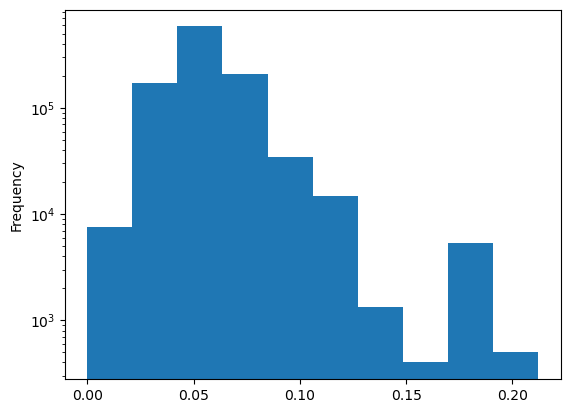

Q


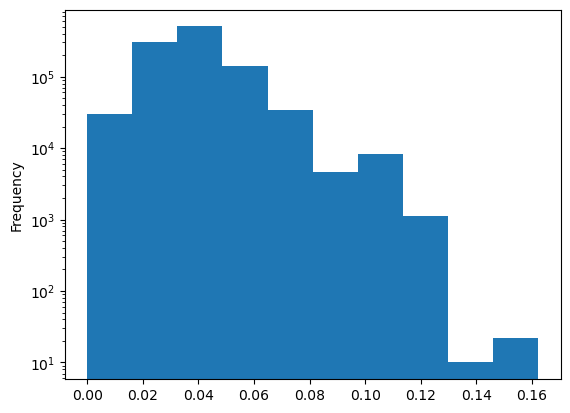

R


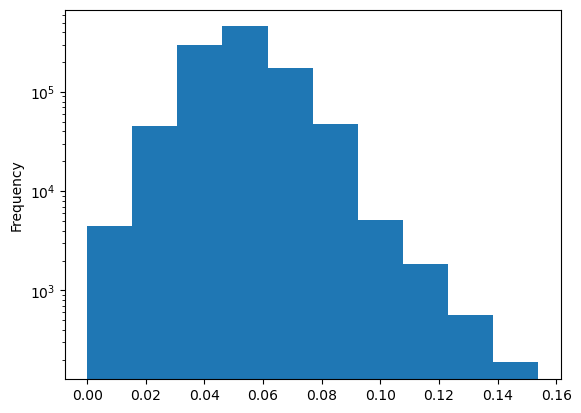

S


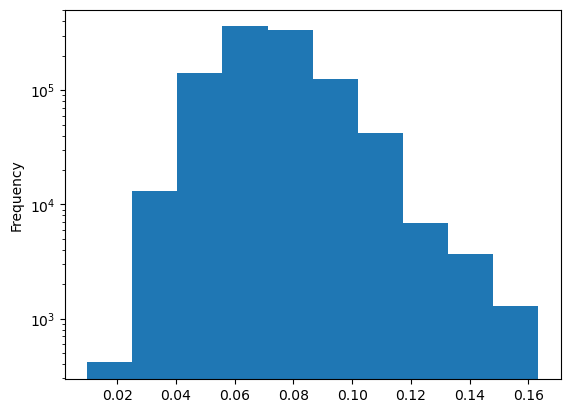

T


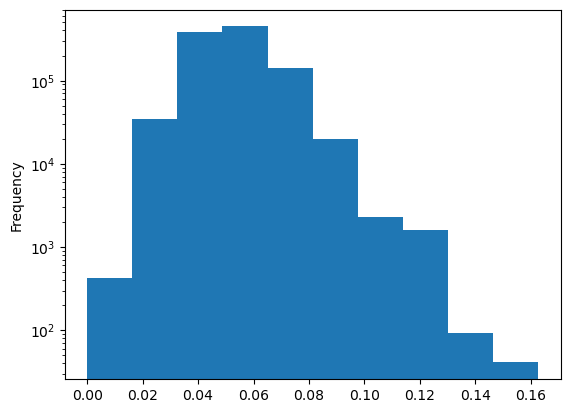

V


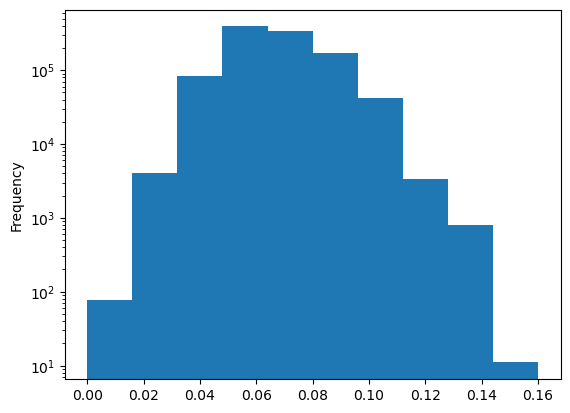

W


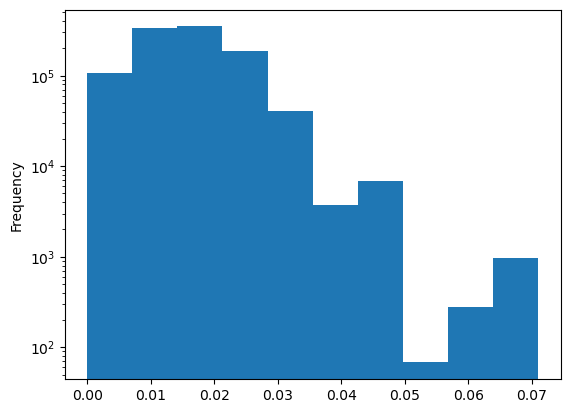

Y


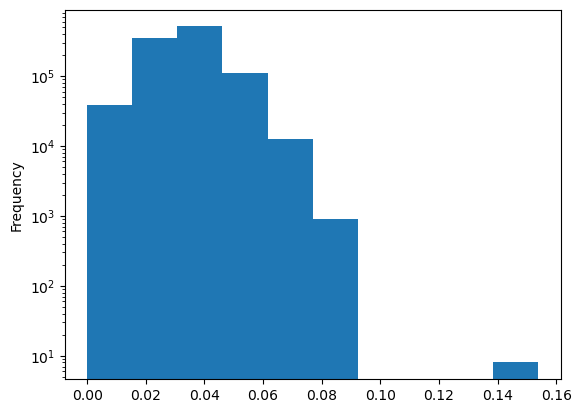

protein_seq_molecular_weight


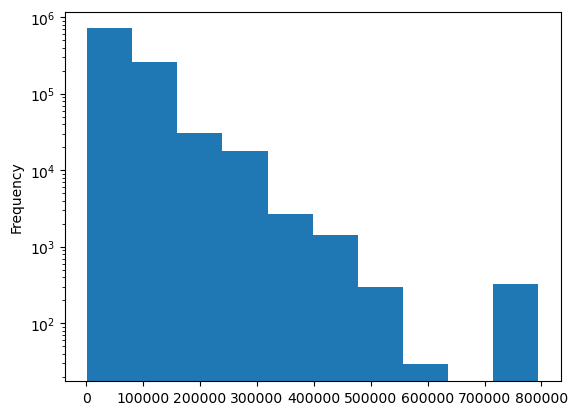

protein_seq_pI


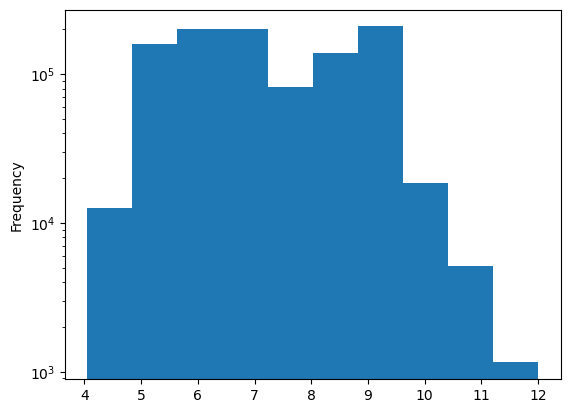

protein_seq_aromaticity


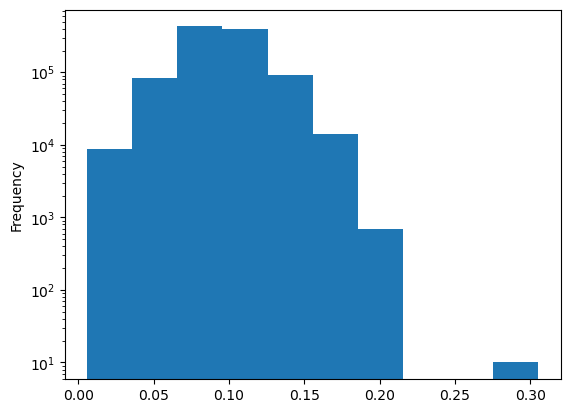

protein_seq_instability_index


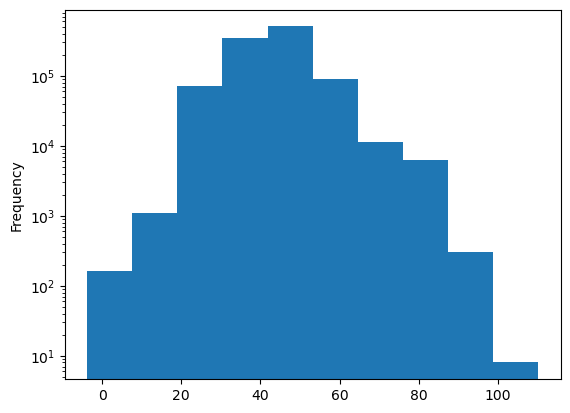

protein_seq_gravy


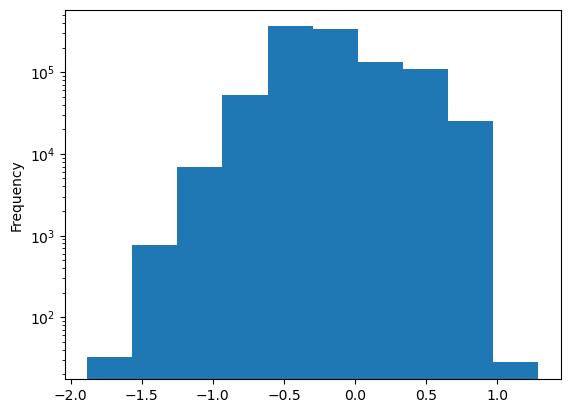

protein_seq_struct_fraction_helix


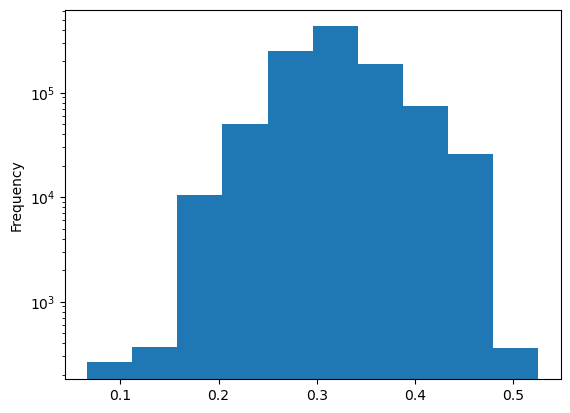

protein_seq_struct_fraction_turn


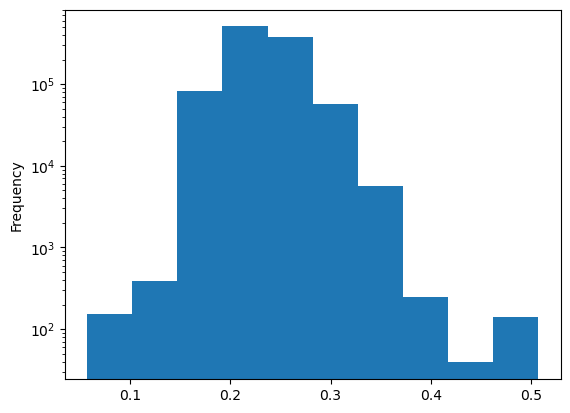

protein_seq_struct_fraction_sheet


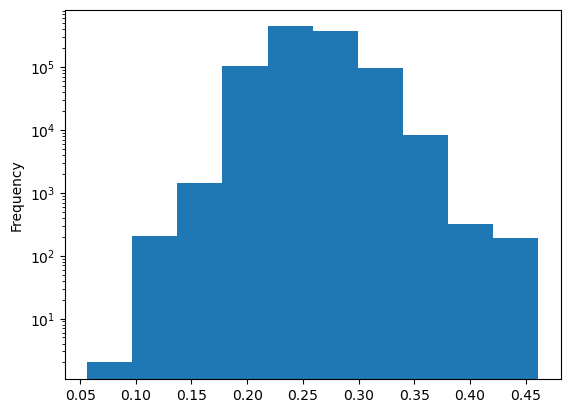

mw


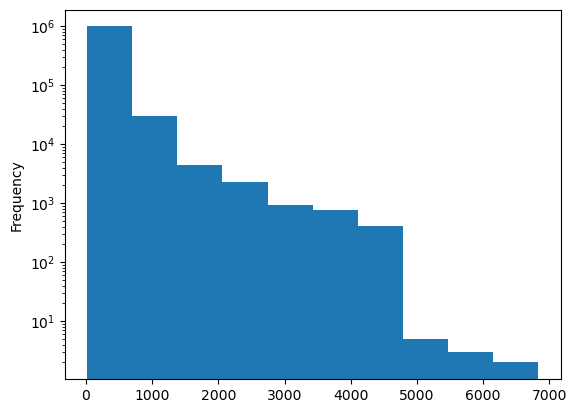

polararea


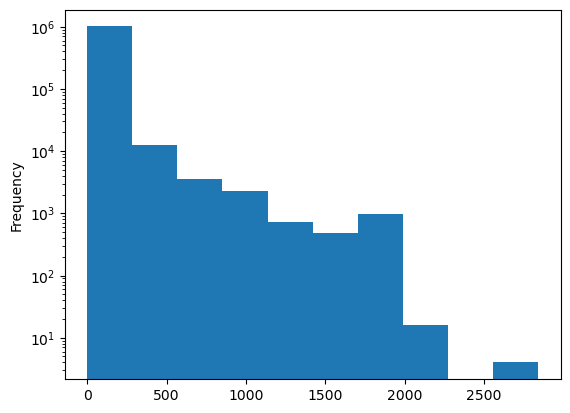

complexity


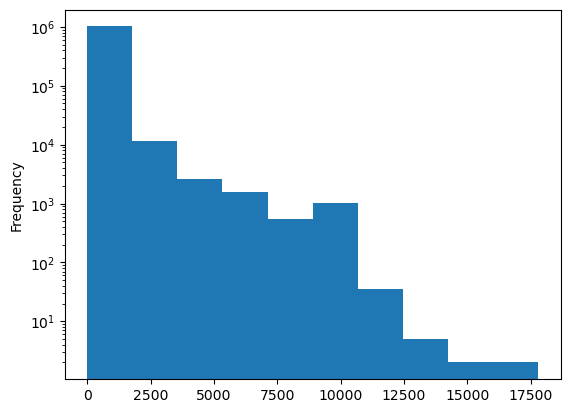

xlogp


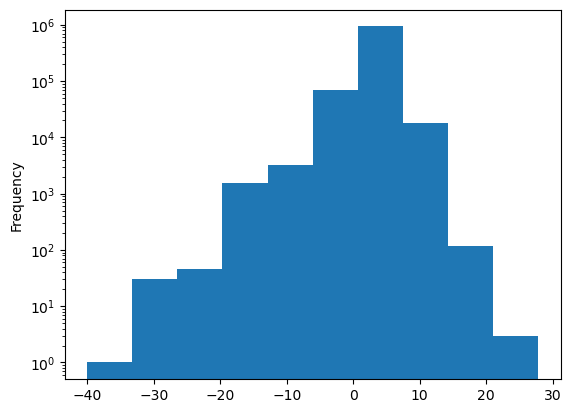

heavycnt


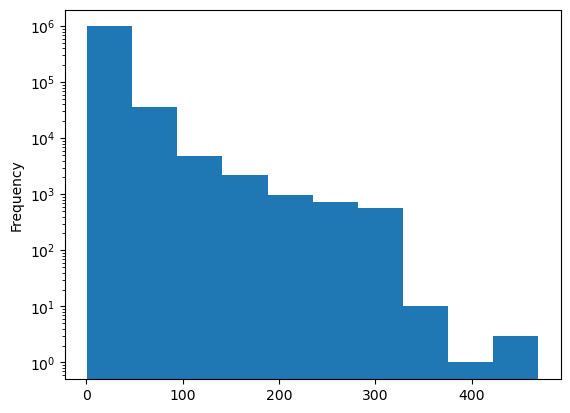

hbonddonor


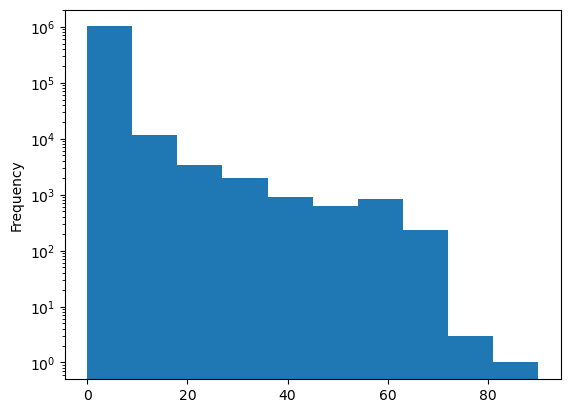

hbondacc


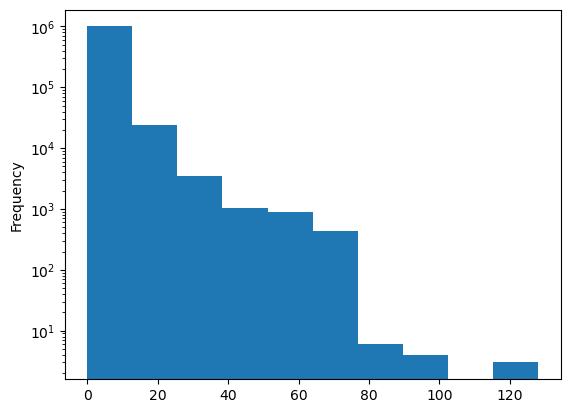

rotbonds


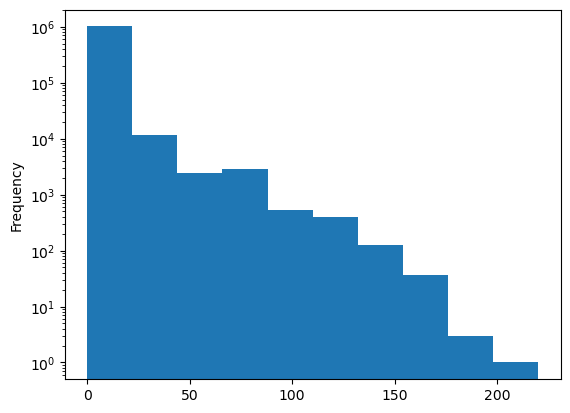

exactmass


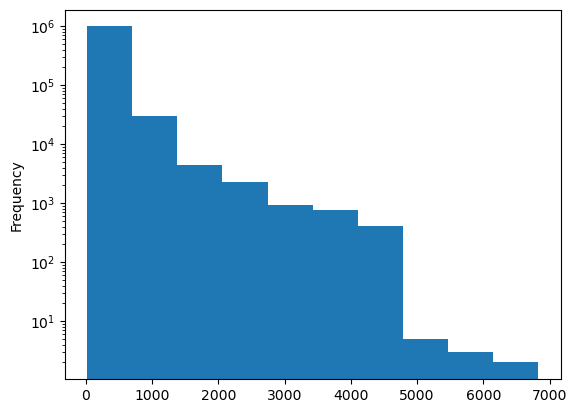

monoisotopicmass


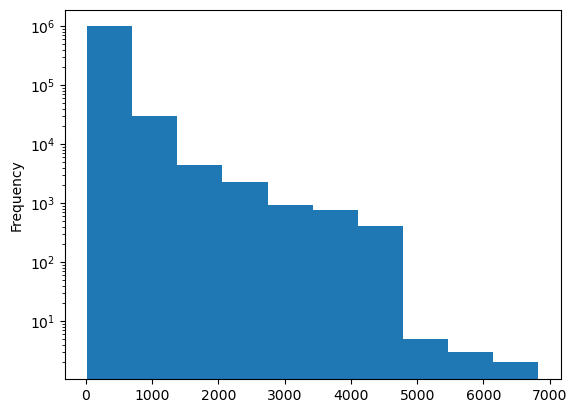

charge


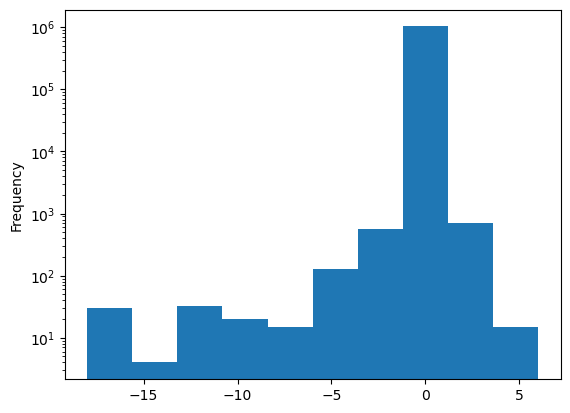

covalentunitcnt


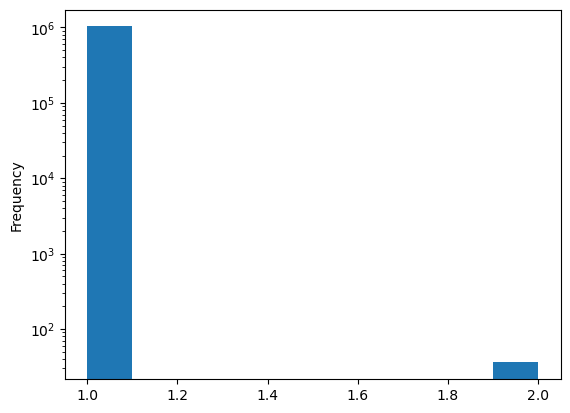

isotopeatomcnt


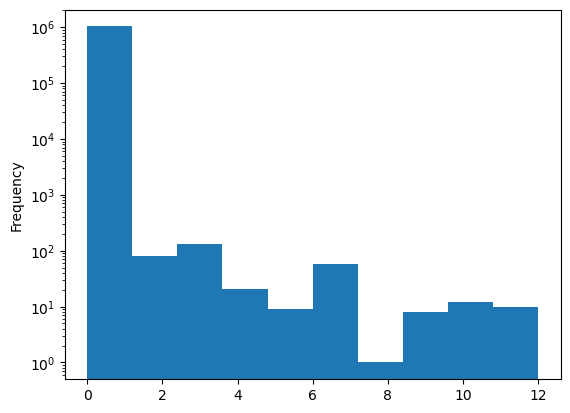

totalatomstereocnt


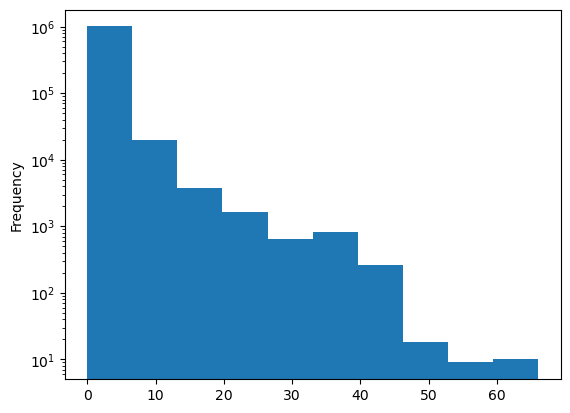

definedatomstereocnt


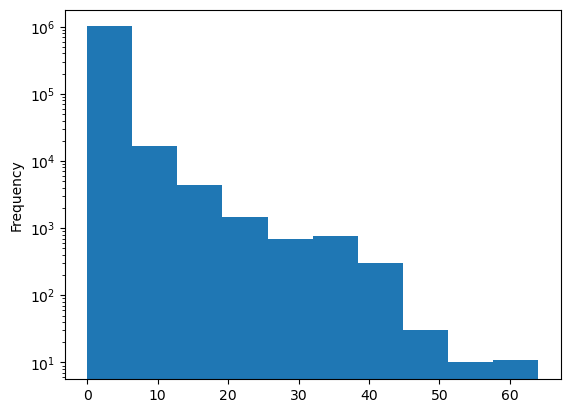

undefinedatomstereocnt


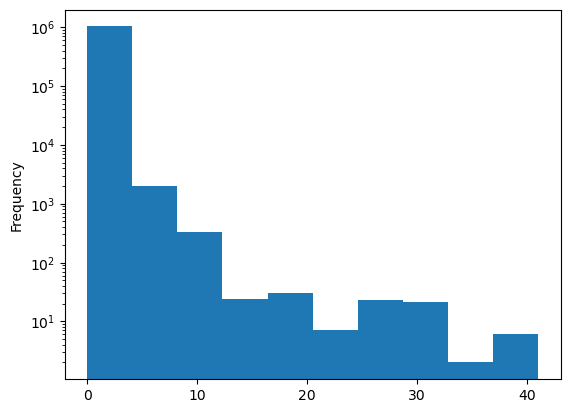

totalbondstereocnt


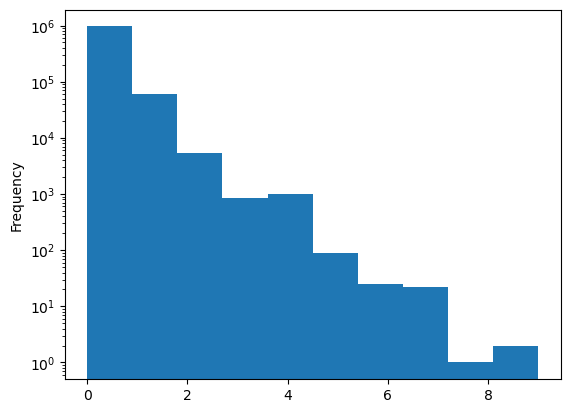

definedbondstereocnt


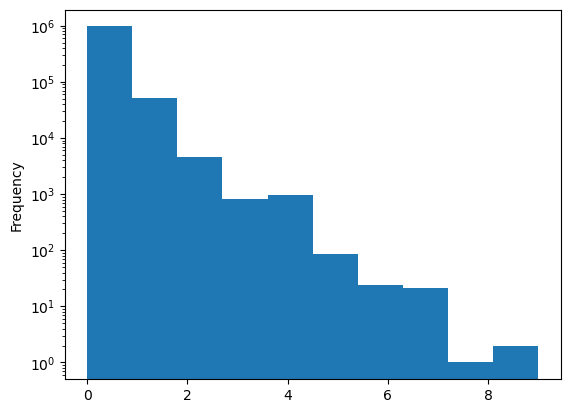

undefinedbondstereocnt


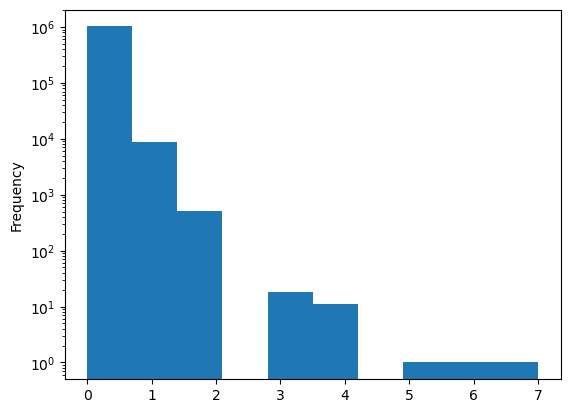

pclidcnt


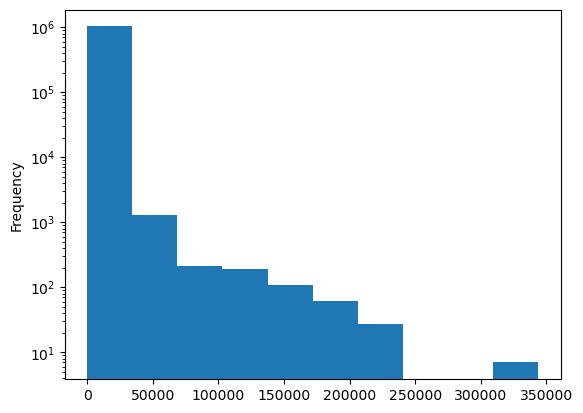

gpidcnt


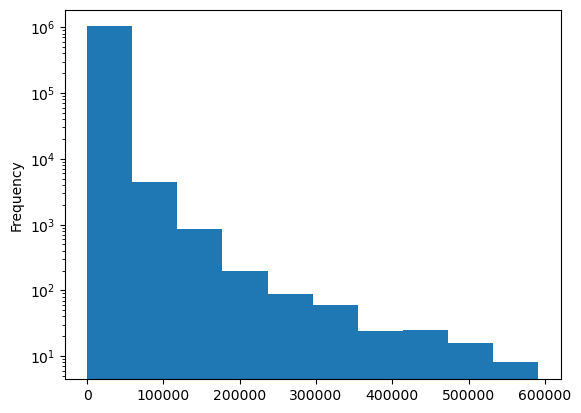

gpfamilycnt


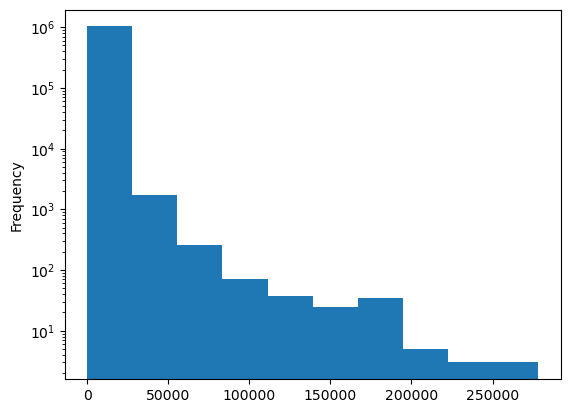

annothitcnt


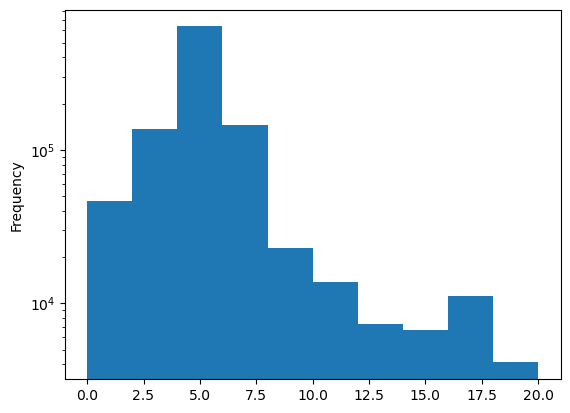

In [113]:
for feature in X.columns:
    print(feature)
    X[feature].plot.hist()
    plt.yscale('log')
    plt.show()